 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [3]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [4]:
df.shape

(1361, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [6]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(967, 15)

In [9]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [11]:
cndt = df['Conductivity']

In [12]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [13]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [14]:
nitr = df['Nitrate']

In [15]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [16]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [17]:
fclf = df['Fecalcaliform']

In [18]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [19]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [21]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [22]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [23]:
df_new['class'] = df_new['class'] == 'yes'

In [24]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [26]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


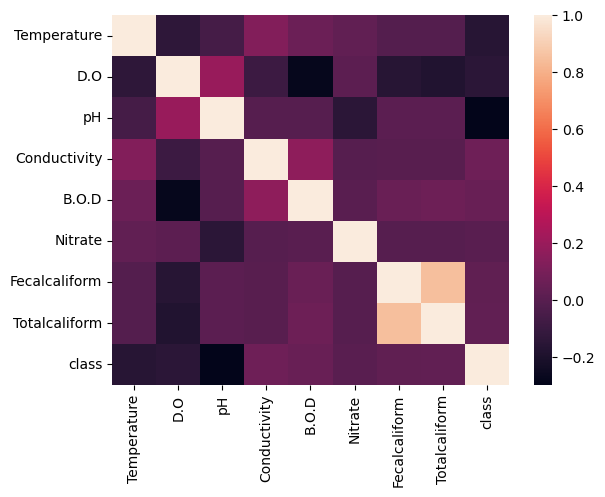

In [27]:
sns.heatmap(df_new.corr());

In [28]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [29]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [30]:
df_new['class'] = df_new['class'] == 'yes'

In [31]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [33]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


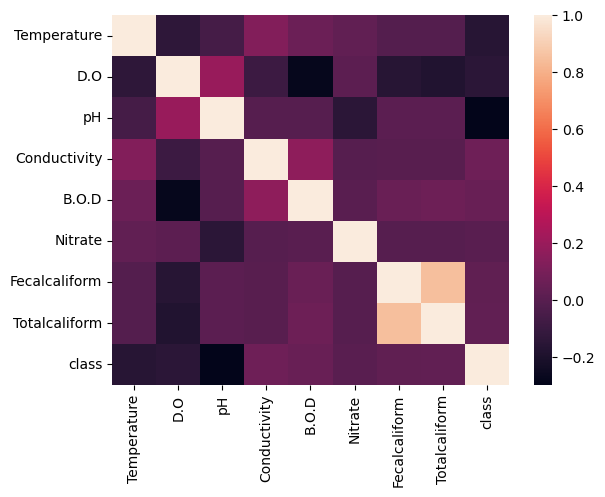

In [34]:
sns.heatmap(df_new.corr());

In [35]:
X = df.loc[:,['Temperature','Conductivity','B.O.D', 'Nitrate','Totalcaliform']]

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   Conductivity   967 non-null    float64
 2   B.O.D          967 non-null    float64
 3   Nitrate        967 non-null    float64
 4   Totalcaliform  967 non-null    float64
dtypes: float64(5)
memory usage: 45.3 KB


In [37]:
X.head()

,Temperature,Conductivity,B.O.D,Nitrate,Totalcaliform
0,9.0,85.0,0.1,0.2,397.0
1,10.0,102.0,0.3,0.4,954.0
2,11.0,96.0,0.2,0.3,653.0
3,13.0,94.0,0.2,0.4,317.0
4,14.0,112.0,0.2,0.5,1072.0


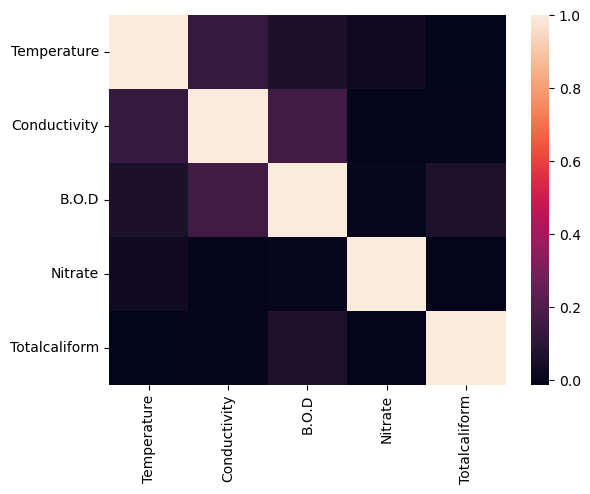

In [38]:
sns.heatmap(X.corr());

In [39]:
[x for x in df['class'].apply(type).unique()]

[str]

In [40]:
df_new['class'].unique()

array([ True, False])

In [41]:
y = df_new['pH']

In [42]:
y.value_counts()

pH
8.000000    72
7.600000    24
7.500000    22
7.800000    22
7.700000    22
            ..
7.872000     1
7.680000     1
7.637500     1
7.545000     1
7.453636     1
Name: count, Length: 577, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [45]:
X_train.shape

(773, 5)

In [46]:
y_train.shape

(773,)

In [47]:
X_val.shape

(194, 5)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE

In [49]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

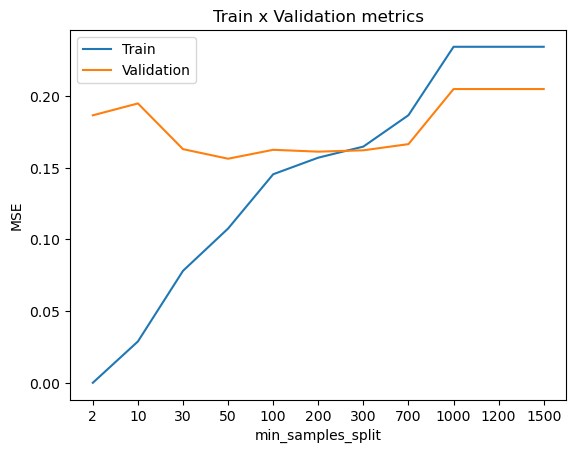

In [50]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [51]:
min_samples_split_list = np.arange(30,105,5)

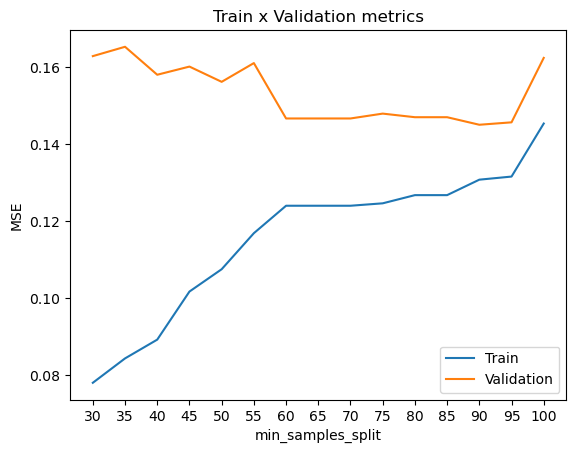

In [52]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [53]:
min_samples_split_list = np.arange(50,100)

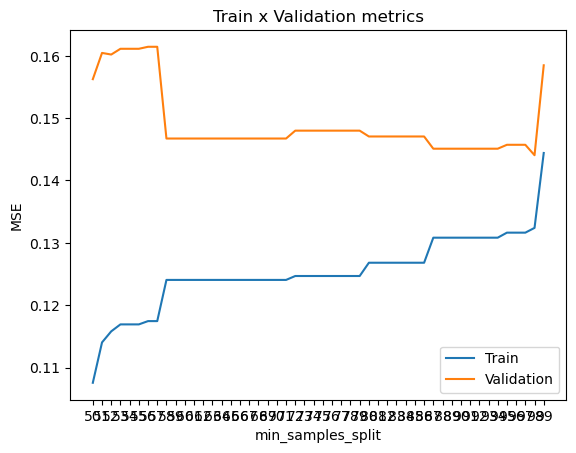

In [54]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [55]:
ind_min_samples_split = np.argmin(MSE_list_val)
ind_min_samples_split

48

In [56]:
best_min_samples_split = min_samples_split_list[ind_min_samples_split]
best_min_samples_split

98

In [57]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

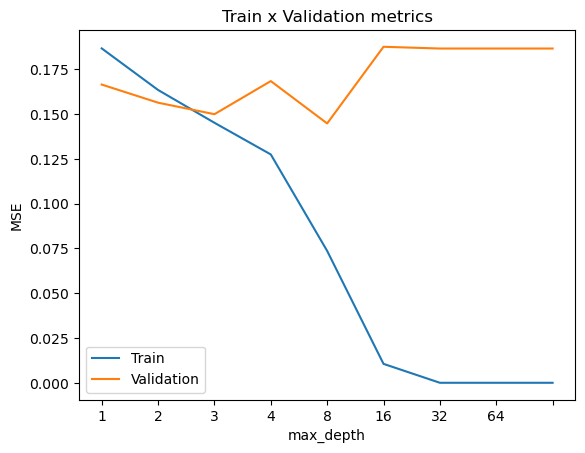

In [58]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [59]:
max_depth_list = np.arange(2,17)

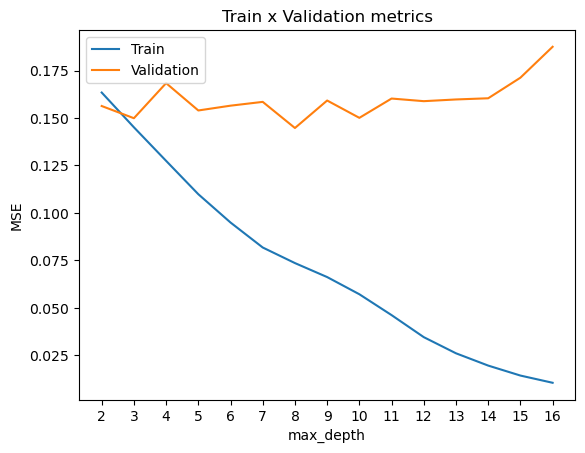

In [60]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [61]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

6

In [62]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

8

    Chosen max_depth = 8
    Chosen min_samples_split = 98

In [63]:
decision_tree_pH_model = DecisionTreeRegressor(min_samples_split = 98,
                                             max_depth = 8,
                                             random_state = 123).fit(X_train,y_train)

In [64]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.1414
MSE for validation:
	MSE: 0.1437


In [65]:
for feature, importance in tuple(zip(decision_tree_pH_model.feature_names_in_,
                                     decision_tree_pH_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.0326
Conductivity: 0.5948
B.O.D: 0.2035
Nitrate: 0.0487
Totalcaliform: 0.1204


In [66]:
y_pred_pH = decision_tree_pH_model.predict(X_val)

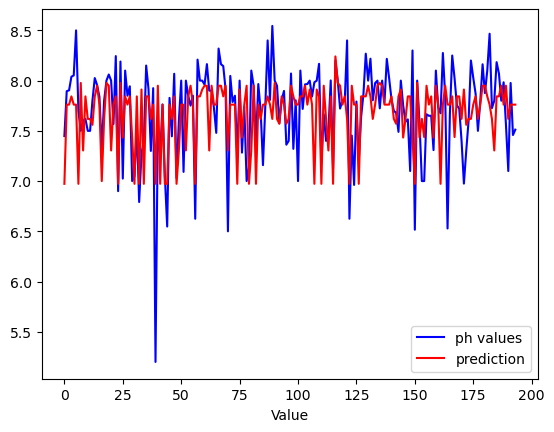

In [67]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [68]:
diff_pH = y_pred_pH - y_val

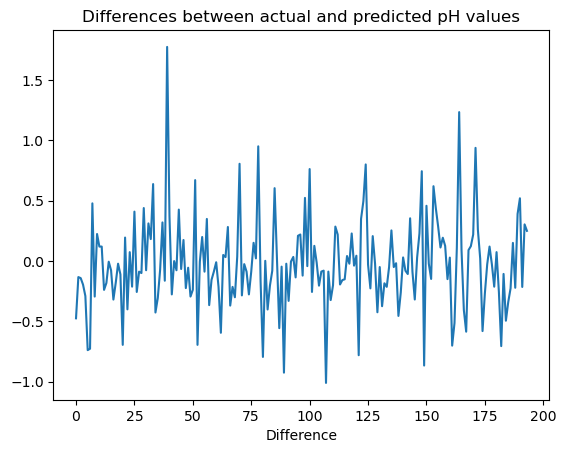

In [69]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values')
plt.xlabel('Sample')
plt.xlabel('Difference');

In [70]:
decision_tree_pH_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 98,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
degree_list = np.arange(1,5)

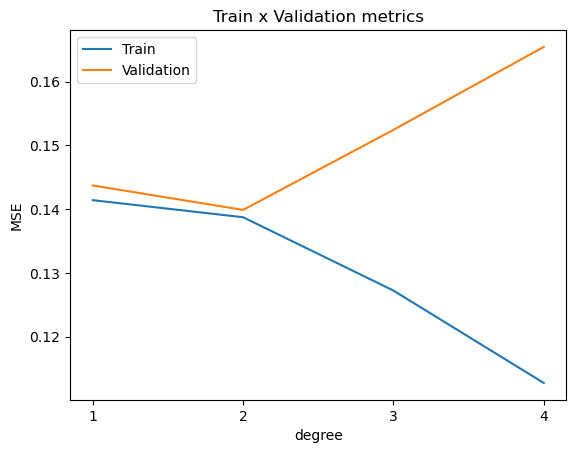

In [73]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 98,
                                  max_depth = 8,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [74]:
MSE_list_val

[0.14370477059573586,
 0.13987706317381887,
 0.1524223226461354,
 0.16542337523438985]

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

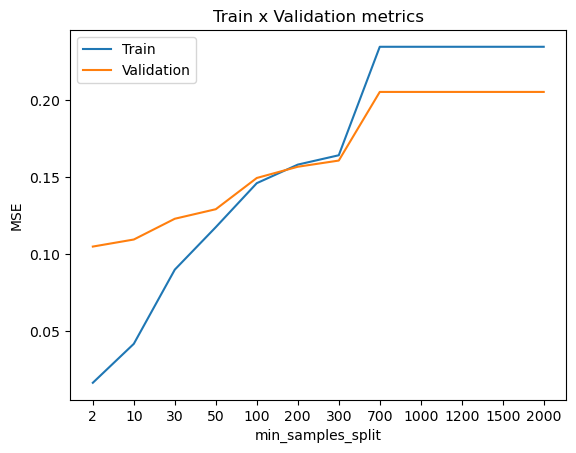

In [77]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [78]:
min_samples_split_list = np.arange(2,11)

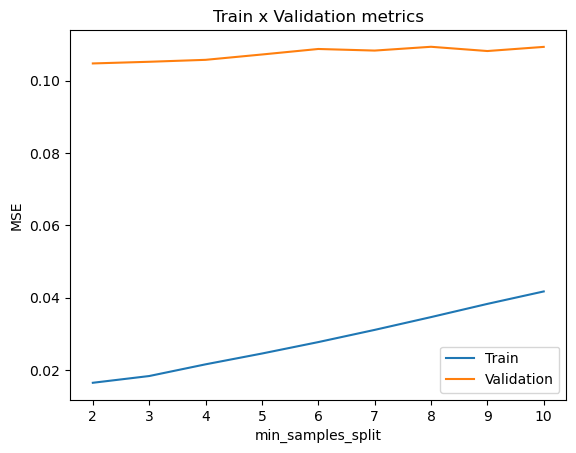

In [79]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [80]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

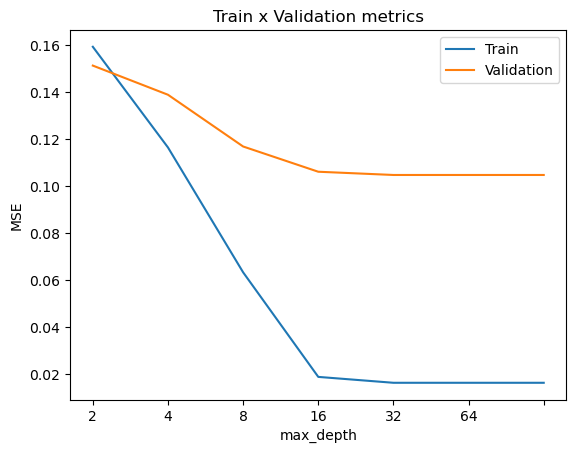

In [81]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [82]:
max_depth_list = np.arange(8,64)

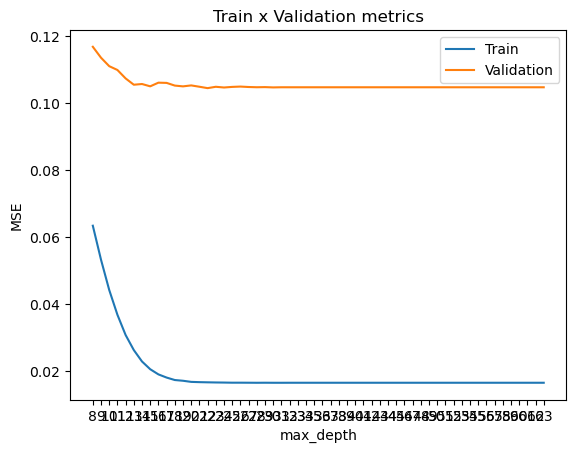

In [83]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [84]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

14

In [85]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

22

In [86]:
n_estimators_list = [10,50,100,500,1000,2000]

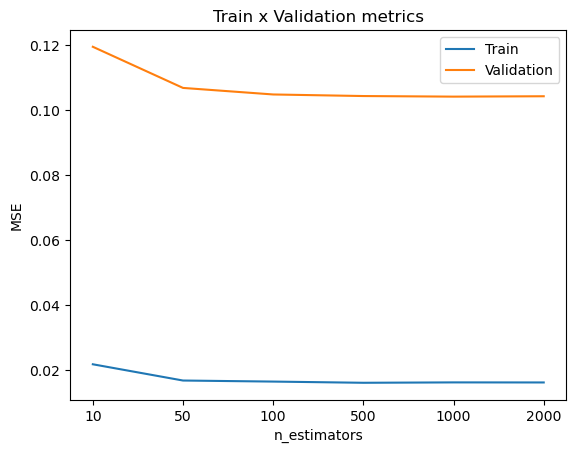

In [87]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [88]:
n_estimators_list = np.arange(100,1000,50)

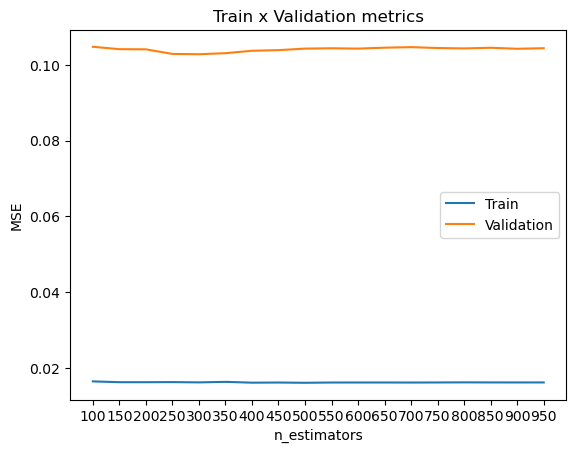

In [89]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [90]:
MSE_list_val

[0.1047463519638999,
 0.1041147044735681,
 0.10407563815438015,
 0.10286014712474081,
 0.10277941106368356,
 0.10305738739030264,
 0.10369382710334074,
 0.10386025848293681,
 0.10426403282054757,
 0.10435072967048535,
 0.10426469770179678,
 0.10450647994744756,
 0.10465209952726667,
 0.10441797074223383,
 0.10431395215388749,
 0.10448604933992092,
 0.10422267413523165,
 0.10436628187934463]

In [91]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

4

In [92]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

300

    Chosen max_depth = 22
    Chosen n_estimators = 300
    Chosen min_samples_split = 2

In [93]:
random_forest_pH_model = RandomForestRegressor(n_estimators = 300,
                                             max_depth = 22, 
                                             min_samples_split = 2).fit(X_train,y_train)

In [94]:
for feature, importance in tuple(zip(random_forest_pH_model.feature_names_in_,
                                     random_forest_pH_model.feature_importances_)):
    print(f"{feature}: {importance:.4f}")

Temperature: 0.1316
Conductivity: 0.3795
B.O.D: 0.1719
Nitrate: 0.1408
Totalcaliform: 0.1763


In [95]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0168
MSE for validation:
	MSE: 0.1053


In [96]:
y_pred_pH = random_forest_pH_model.predict(X_val)

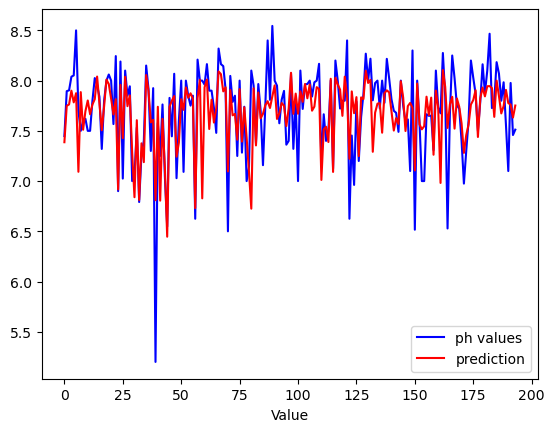

In [97]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [98]:
diff_pH = y_pred_pH - y_val

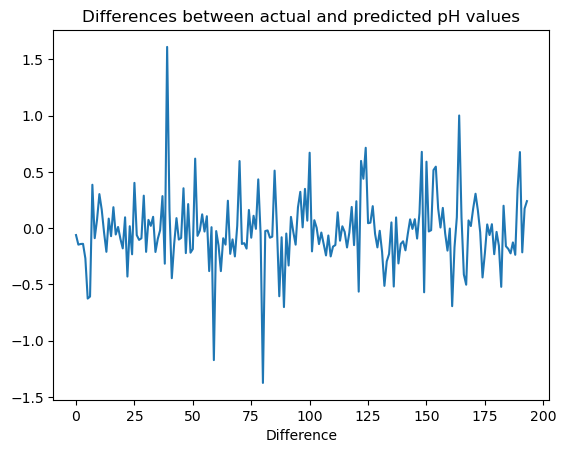

In [99]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values')
plt.xlabel('Sample')
plt.xlabel('Difference');

In [100]:
from xgboost import XGBRegressor

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [102]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [103]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [104]:
n_estimators_list = [10,50,100,500,1000,2000]

In [105]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46622
[3]	validation_0-rmse:1.75292
[4]	validation_0-rmse:1.26094
[5]	validation_0-rmse:0.92544
[6]	validation_0-rmse:0.69602
[7]	validation_0-rmse:0.55974
[8]	validation_0-rmse:0.47157
[9]	validation_0-rmse:0.42087
[0]	validation_0-rmse:4.99489
[1]	validation_0-rmse:3.50403
[2]	validation_0-rmse:2.46622
[3]	validation_0-rmse:1.75292
[4]	validation_0-rmse:1.26094
[5]	validation_0-rmse:0.92544
[6]	validation_0-rmse:0.69602
[7]	validation_0-rmse:0.55974
[8]	validation_0-rmse:0.47157
[9]	validation_0-rmse:0.42087
[10]	validation_0-rmse:0.39143
[11]	validation_0-rmse:0.37556
[12]	validation_0-rmse:0.37180
[13]	validation_0-rmse:0.36933
[14]	validation_0-rmse:0.36851
[15]	validation_0-rmse:0.36851
[16]	validation_0-rmse:0.36705
[17]	validation_0-rmse:0.36680
[18]	validation_0-rmse:0.36933
[19]	validation_0-rmse:0.37033
[20]	validation_0-rmse:0.36969
[21]	validation_0-rmse:0.36938
[22]	validation_0-rmse:0.370

[106]	validation_0-rmse:0.36922
[107]	validation_0-rmse:0.36923
[108]	validation_0-rmse:0.36923
[109]	validation_0-rmse:0.36914
[110]	validation_0-rmse:0.36913
[111]	validation_0-rmse:0.36923
[112]	validation_0-rmse:0.36916
[113]	validation_0-rmse:0.36927
[114]	validation_0-rmse:0.36926
[115]	validation_0-rmse:0.36932
[116]	validation_0-rmse:0.36944
[117]	validation_0-rmse:0.36946
[118]	validation_0-rmse:0.36953
[119]	validation_0-rmse:0.36950
[120]	validation_0-rmse:0.36953
[121]	validation_0-rmse:0.36953
[122]	validation_0-rmse:0.36953
[123]	validation_0-rmse:0.36963
[124]	validation_0-rmse:0.36963
[125]	validation_0-rmse:0.36966
[126]	validation_0-rmse:0.36988
[127]	validation_0-rmse:0.36984
[128]	validation_0-rmse:0.36982
[129]	validation_0-rmse:0.36981
[130]	validation_0-rmse:0.36995
[131]	validation_0-rmse:0.36994
[132]	validation_0-rmse:0.36992
[133]	validation_0-rmse:0.36993
[134]	validation_0-rmse:0.36998
[135]	validation_0-rmse:0.36985
[136]	validation_0-rmse:0.36987
[137]	va

[363]	validation_0-rmse:0.36996
[364]	validation_0-rmse:0.36996
[365]	validation_0-rmse:0.36996
[366]	validation_0-rmse:0.36996
[367]	validation_0-rmse:0.36996
[368]	validation_0-rmse:0.36996
[369]	validation_0-rmse:0.36996
[370]	validation_0-rmse:0.36996
[371]	validation_0-rmse:0.36996
[372]	validation_0-rmse:0.36996
[373]	validation_0-rmse:0.36996
[374]	validation_0-rmse:0.36996
[375]	validation_0-rmse:0.36996
[376]	validation_0-rmse:0.36996
[377]	validation_0-rmse:0.36996
[378]	validation_0-rmse:0.36996
[379]	validation_0-rmse:0.36996
[380]	validation_0-rmse:0.36996
[381]	validation_0-rmse:0.36996
[382]	validation_0-rmse:0.36996
[383]	validation_0-rmse:0.36996
[384]	validation_0-rmse:0.36996
[385]	validation_0-rmse:0.36996
[386]	validation_0-rmse:0.36996
[387]	validation_0-rmse:0.36996
[388]	validation_0-rmse:0.36996
[389]	validation_0-rmse:0.36996
[390]	validation_0-rmse:0.36996
[391]	validation_0-rmse:0.36996
[392]	validation_0-rmse:0.36996
[393]	validation_0-rmse:0.36996
[394]	va

[123]	validation_0-rmse:0.36963
[124]	validation_0-rmse:0.36963
[125]	validation_0-rmse:0.36966
[126]	validation_0-rmse:0.36988
[127]	validation_0-rmse:0.36984
[128]	validation_0-rmse:0.36982
[129]	validation_0-rmse:0.36981
[130]	validation_0-rmse:0.36995
[131]	validation_0-rmse:0.36994
[132]	validation_0-rmse:0.36992
[133]	validation_0-rmse:0.36993
[134]	validation_0-rmse:0.36998
[135]	validation_0-rmse:0.36985
[136]	validation_0-rmse:0.36987
[137]	validation_0-rmse:0.36986
[138]	validation_0-rmse:0.36981
[139]	validation_0-rmse:0.36972
[140]	validation_0-rmse:0.36961
[141]	validation_0-rmse:0.36961
[142]	validation_0-rmse:0.36966
[143]	validation_0-rmse:0.36967
[144]	validation_0-rmse:0.36970
[145]	validation_0-rmse:0.36974
[146]	validation_0-rmse:0.36975
[147]	validation_0-rmse:0.36974
[148]	validation_0-rmse:0.36974
[149]	validation_0-rmse:0.36979
[150]	validation_0-rmse:0.36978
[151]	validation_0-rmse:0.36981
[152]	validation_0-rmse:0.36980
[153]	validation_0-rmse:0.36981
[154]	va

[380]	validation_0-rmse:0.36996
[381]	validation_0-rmse:0.36996
[382]	validation_0-rmse:0.36996
[383]	validation_0-rmse:0.36996
[384]	validation_0-rmse:0.36996
[385]	validation_0-rmse:0.36996
[386]	validation_0-rmse:0.36996
[387]	validation_0-rmse:0.36996
[388]	validation_0-rmse:0.36996
[389]	validation_0-rmse:0.36996
[390]	validation_0-rmse:0.36996
[391]	validation_0-rmse:0.36996
[392]	validation_0-rmse:0.36996
[393]	validation_0-rmse:0.36996
[394]	validation_0-rmse:0.36996
[395]	validation_0-rmse:0.36996
[396]	validation_0-rmse:0.36996
[397]	validation_0-rmse:0.36996
[398]	validation_0-rmse:0.36996
[399]	validation_0-rmse:0.36996
[400]	validation_0-rmse:0.36996
[401]	validation_0-rmse:0.36996
[402]	validation_0-rmse:0.36996
[403]	validation_0-rmse:0.36996
[404]	validation_0-rmse:0.36996
[405]	validation_0-rmse:0.36996
[406]	validation_0-rmse:0.36996
[407]	validation_0-rmse:0.36996
[408]	validation_0-rmse:0.36996
[409]	validation_0-rmse:0.36996
[410]	validation_0-rmse:0.36996
[411]	va

[637]	validation_0-rmse:0.36996
[638]	validation_0-rmse:0.36996
[639]	validation_0-rmse:0.36996
[640]	validation_0-rmse:0.36996
[641]	validation_0-rmse:0.36996
[642]	validation_0-rmse:0.36996
[643]	validation_0-rmse:0.36996
[644]	validation_0-rmse:0.36996
[645]	validation_0-rmse:0.36996
[646]	validation_0-rmse:0.36996
[647]	validation_0-rmse:0.36996
[648]	validation_0-rmse:0.36996
[649]	validation_0-rmse:0.36996
[650]	validation_0-rmse:0.36996
[651]	validation_0-rmse:0.36996
[652]	validation_0-rmse:0.36996
[653]	validation_0-rmse:0.36996
[654]	validation_0-rmse:0.36996
[655]	validation_0-rmse:0.36996
[656]	validation_0-rmse:0.36996
[657]	validation_0-rmse:0.36996
[658]	validation_0-rmse:0.36996
[659]	validation_0-rmse:0.36996
[660]	validation_0-rmse:0.36996
[661]	validation_0-rmse:0.36996
[662]	validation_0-rmse:0.36996
[663]	validation_0-rmse:0.36996
[664]	validation_0-rmse:0.36996
[665]	validation_0-rmse:0.36996
[666]	validation_0-rmse:0.36996
[667]	validation_0-rmse:0.36996
[668]	va

[894]	validation_0-rmse:0.36996
[895]	validation_0-rmse:0.36996
[896]	validation_0-rmse:0.36996
[897]	validation_0-rmse:0.36996
[898]	validation_0-rmse:0.36996
[899]	validation_0-rmse:0.36996
[900]	validation_0-rmse:0.36996
[901]	validation_0-rmse:0.36996
[902]	validation_0-rmse:0.36996
[903]	validation_0-rmse:0.36996
[904]	validation_0-rmse:0.36996
[905]	validation_0-rmse:0.36996
[906]	validation_0-rmse:0.36996
[907]	validation_0-rmse:0.36996
[908]	validation_0-rmse:0.36996
[909]	validation_0-rmse:0.36996
[910]	validation_0-rmse:0.36996
[911]	validation_0-rmse:0.36996
[912]	validation_0-rmse:0.36996
[913]	validation_0-rmse:0.36996
[914]	validation_0-rmse:0.36996
[915]	validation_0-rmse:0.36996
[916]	validation_0-rmse:0.36996
[917]	validation_0-rmse:0.36996
[918]	validation_0-rmse:0.36996
[919]	validation_0-rmse:0.36996
[920]	validation_0-rmse:0.36996
[921]	validation_0-rmse:0.36996
[922]	validation_0-rmse:0.36996
[923]	validation_0-rmse:0.36996
[924]	validation_0-rmse:0.36996
[925]	va

[154]	validation_0-rmse:0.36981
[155]	validation_0-rmse:0.36980
[156]	validation_0-rmse:0.36981
[157]	validation_0-rmse:0.36981
[158]	validation_0-rmse:0.36986
[159]	validation_0-rmse:0.36992
[160]	validation_0-rmse:0.36995
[161]	validation_0-rmse:0.36997
[162]	validation_0-rmse:0.37001
[163]	validation_0-rmse:0.37000
[164]	validation_0-rmse:0.37003
[165]	validation_0-rmse:0.37005
[166]	validation_0-rmse:0.37007
[167]	validation_0-rmse:0.37009
[168]	validation_0-rmse:0.37010
[169]	validation_0-rmse:0.37011
[170]	validation_0-rmse:0.37014
[171]	validation_0-rmse:0.37015
[172]	validation_0-rmse:0.37013
[173]	validation_0-rmse:0.37014
[174]	validation_0-rmse:0.37009
[175]	validation_0-rmse:0.37004
[176]	validation_0-rmse:0.37002
[177]	validation_0-rmse:0.37002
[178]	validation_0-rmse:0.37002
[179]	validation_0-rmse:0.37001
[180]	validation_0-rmse:0.36997
[181]	validation_0-rmse:0.36998
[182]	validation_0-rmse:0.36998
[183]	validation_0-rmse:0.36994
[184]	validation_0-rmse:0.36997
[185]	va

[411]	validation_0-rmse:0.36996
[412]	validation_0-rmse:0.36996
[413]	validation_0-rmse:0.36996
[414]	validation_0-rmse:0.36996
[415]	validation_0-rmse:0.36996
[416]	validation_0-rmse:0.36996
[417]	validation_0-rmse:0.36996
[418]	validation_0-rmse:0.36996
[419]	validation_0-rmse:0.36996
[420]	validation_0-rmse:0.36996
[421]	validation_0-rmse:0.36996
[422]	validation_0-rmse:0.36996
[423]	validation_0-rmse:0.36996
[424]	validation_0-rmse:0.36996
[425]	validation_0-rmse:0.36996
[426]	validation_0-rmse:0.36996
[427]	validation_0-rmse:0.36996
[428]	validation_0-rmse:0.36996
[429]	validation_0-rmse:0.36996
[430]	validation_0-rmse:0.36996
[431]	validation_0-rmse:0.36996
[432]	validation_0-rmse:0.36996
[433]	validation_0-rmse:0.36996
[434]	validation_0-rmse:0.36996
[435]	validation_0-rmse:0.36996
[436]	validation_0-rmse:0.36996
[437]	validation_0-rmse:0.36996
[438]	validation_0-rmse:0.36996
[439]	validation_0-rmse:0.36996
[440]	validation_0-rmse:0.36996
[441]	validation_0-rmse:0.36996
[442]	va

[668]	validation_0-rmse:0.36996
[669]	validation_0-rmse:0.36996
[670]	validation_0-rmse:0.36996
[671]	validation_0-rmse:0.36996
[672]	validation_0-rmse:0.36996
[673]	validation_0-rmse:0.36996
[674]	validation_0-rmse:0.36996
[675]	validation_0-rmse:0.36996
[676]	validation_0-rmse:0.36996
[677]	validation_0-rmse:0.36996
[678]	validation_0-rmse:0.36996
[679]	validation_0-rmse:0.36996
[680]	validation_0-rmse:0.36996
[681]	validation_0-rmse:0.36996
[682]	validation_0-rmse:0.36996
[683]	validation_0-rmse:0.36996
[684]	validation_0-rmse:0.36996
[685]	validation_0-rmse:0.36996
[686]	validation_0-rmse:0.36996
[687]	validation_0-rmse:0.36996
[688]	validation_0-rmse:0.36996
[689]	validation_0-rmse:0.36996
[690]	validation_0-rmse:0.36996
[691]	validation_0-rmse:0.36996
[692]	validation_0-rmse:0.36996
[693]	validation_0-rmse:0.36996
[694]	validation_0-rmse:0.36996
[695]	validation_0-rmse:0.36996
[696]	validation_0-rmse:0.36996
[697]	validation_0-rmse:0.36996
[698]	validation_0-rmse:0.36996
[699]	va

[925]	validation_0-rmse:0.36996
[926]	validation_0-rmse:0.36996
[927]	validation_0-rmse:0.36996
[928]	validation_0-rmse:0.36996
[929]	validation_0-rmse:0.36996
[930]	validation_0-rmse:0.36996
[931]	validation_0-rmse:0.36996
[932]	validation_0-rmse:0.36996
[933]	validation_0-rmse:0.36996
[934]	validation_0-rmse:0.36996
[935]	validation_0-rmse:0.36996
[936]	validation_0-rmse:0.36996
[937]	validation_0-rmse:0.36996
[938]	validation_0-rmse:0.36996
[939]	validation_0-rmse:0.36996
[940]	validation_0-rmse:0.36996
[941]	validation_0-rmse:0.36996
[942]	validation_0-rmse:0.36996
[943]	validation_0-rmse:0.36996
[944]	validation_0-rmse:0.36996
[945]	validation_0-rmse:0.36996
[946]	validation_0-rmse:0.36996
[947]	validation_0-rmse:0.36996
[948]	validation_0-rmse:0.36996
[949]	validation_0-rmse:0.36996
[950]	validation_0-rmse:0.36996
[951]	validation_0-rmse:0.36996
[952]	validation_0-rmse:0.36996
[953]	validation_0-rmse:0.36996
[954]	validation_0-rmse:0.36996
[955]	validation_0-rmse:0.36996
[956]	va

[1176]	validation_0-rmse:0.36996
[1177]	validation_0-rmse:0.36996
[1178]	validation_0-rmse:0.36996
[1179]	validation_0-rmse:0.36996
[1180]	validation_0-rmse:0.36996
[1181]	validation_0-rmse:0.36996
[1182]	validation_0-rmse:0.36996
[1183]	validation_0-rmse:0.36996
[1184]	validation_0-rmse:0.36996
[1185]	validation_0-rmse:0.36996
[1186]	validation_0-rmse:0.36996
[1187]	validation_0-rmse:0.36996
[1188]	validation_0-rmse:0.36996
[1189]	validation_0-rmse:0.36996
[1190]	validation_0-rmse:0.36996
[1191]	validation_0-rmse:0.36996
[1192]	validation_0-rmse:0.36996
[1193]	validation_0-rmse:0.36996
[1194]	validation_0-rmse:0.36996
[1195]	validation_0-rmse:0.36996
[1196]	validation_0-rmse:0.36996
[1197]	validation_0-rmse:0.36996
[1198]	validation_0-rmse:0.36996
[1199]	validation_0-rmse:0.36996
[1200]	validation_0-rmse:0.36996
[1201]	validation_0-rmse:0.36996
[1202]	validation_0-rmse:0.36996
[1203]	validation_0-rmse:0.36996
[1204]	validation_0-rmse:0.36996
[1205]	validation_0-rmse:0.36996
[1206]	val

[1425]	validation_0-rmse:0.36996
[1426]	validation_0-rmse:0.36996
[1427]	validation_0-rmse:0.36996
[1428]	validation_0-rmse:0.36996
[1429]	validation_0-rmse:0.36996
[1430]	validation_0-rmse:0.36996
[1431]	validation_0-rmse:0.36996
[1432]	validation_0-rmse:0.36996
[1433]	validation_0-rmse:0.36996
[1434]	validation_0-rmse:0.36996
[1435]	validation_0-rmse:0.36996
[1436]	validation_0-rmse:0.36996
[1437]	validation_0-rmse:0.36996
[1438]	validation_0-rmse:0.36996
[1439]	validation_0-rmse:0.36996
[1440]	validation_0-rmse:0.36996
[1441]	validation_0-rmse:0.36996
[1442]	validation_0-rmse:0.36996
[1443]	validation_0-rmse:0.36996
[1444]	validation_0-rmse:0.36996
[1445]	validation_0-rmse:0.36996
[1446]	validation_0-rmse:0.36996
[1447]	validation_0-rmse:0.36996
[1448]	validation_0-rmse:0.36996
[1449]	validation_0-rmse:0.36996
[1450]	validation_0-rmse:0.36996
[1451]	validation_0-rmse:0.36996
[1452]	validation_0-rmse:0.36996
[1453]	validation_0-rmse:0.36996
[1454]	validation_0-rmse:0.36996
[1455]	val

[1674]	validation_0-rmse:0.36996
[1675]	validation_0-rmse:0.36996
[1676]	validation_0-rmse:0.36996
[1677]	validation_0-rmse:0.36996
[1678]	validation_0-rmse:0.36996
[1679]	validation_0-rmse:0.36996
[1680]	validation_0-rmse:0.36996
[1681]	validation_0-rmse:0.36996
[1682]	validation_0-rmse:0.36996
[1683]	validation_0-rmse:0.36996
[1684]	validation_0-rmse:0.36996
[1685]	validation_0-rmse:0.36996
[1686]	validation_0-rmse:0.36996
[1687]	validation_0-rmse:0.36996
[1688]	validation_0-rmse:0.36996
[1689]	validation_0-rmse:0.36996
[1690]	validation_0-rmse:0.36996
[1691]	validation_0-rmse:0.36996
[1692]	validation_0-rmse:0.36996
[1693]	validation_0-rmse:0.36996
[1694]	validation_0-rmse:0.36996
[1695]	validation_0-rmse:0.36996
[1696]	validation_0-rmse:0.36996
[1697]	validation_0-rmse:0.36996
[1698]	validation_0-rmse:0.36996
[1699]	validation_0-rmse:0.36996
[1700]	validation_0-rmse:0.36996
[1701]	validation_0-rmse:0.36996
[1702]	validation_0-rmse:0.36996
[1703]	validation_0-rmse:0.36996
[1704]	val

[1923]	validation_0-rmse:0.36996
[1924]	validation_0-rmse:0.36996
[1925]	validation_0-rmse:0.36996
[1926]	validation_0-rmse:0.36996
[1927]	validation_0-rmse:0.36996
[1928]	validation_0-rmse:0.36996
[1929]	validation_0-rmse:0.36996
[1930]	validation_0-rmse:0.36996
[1931]	validation_0-rmse:0.36996
[1932]	validation_0-rmse:0.36996
[1933]	validation_0-rmse:0.36996
[1934]	validation_0-rmse:0.36996
[1935]	validation_0-rmse:0.36996
[1936]	validation_0-rmse:0.36996
[1937]	validation_0-rmse:0.36996
[1938]	validation_0-rmse:0.36996
[1939]	validation_0-rmse:0.36996
[1940]	validation_0-rmse:0.36996
[1941]	validation_0-rmse:0.36996
[1942]	validation_0-rmse:0.36996
[1943]	validation_0-rmse:0.36996
[1944]	validation_0-rmse:0.36996
[1945]	validation_0-rmse:0.36996
[1946]	validation_0-rmse:0.36996
[1947]	validation_0-rmse:0.36996
[1948]	validation_0-rmse:0.36996
[1949]	validation_0-rmse:0.36996
[1950]	validation_0-rmse:0.36996
[1951]	validation_0-rmse:0.36996
[1952]	validation_0-rmse:0.36996
[1953]	val

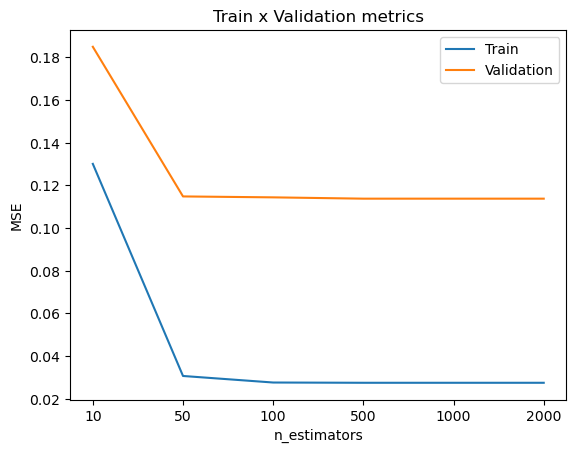

In [106]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [107]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [108]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

500

In [109]:
xgb_pH_model = XGBRegressor(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_pH_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:6.42095
[1]	validation_0-rmse:5.77873
[2]	validation_0-rmse:5.20232
[3]	validation_0-rmse:4.68393
[4]	validation_0-rmse:4.21664
[5]	validation_0-rmse:3.79746
[6]	validation_0-rmse:3.42077
[7]	validation_0-rmse:3.08249
[8]	validation_0-rmse:2.77846
[9]	validation_0-rmse:2.50737
[10]	validation_0-rmse:2.26223
[11]	validation_0-rmse:2.04225
[12]	validation_0-rmse:1.84393
[13]	validation_0-rmse:1.66810
[14]	validation_0-rmse:1.50960
[15]	validation_0-rmse:1.36839
[16]	validation_0-rmse:1.24143
[17]	validation_0-rmse:1.12776
[18]	validation_0-rmse:1.02718
[19]	validation_0-rmse:0.93979
[20]	validation_0-rmse:0.86322
[21]	validation_0-rmse:0.79291
[22]	validation_0-rmse:0.73232
[23]	validation_0-rmse:0.68154
[24]	validation_0-rmse:0.63601
[25]	validation_0-rmse:0.59597
[26]	validation_0-rmse:0.56068
[27]	validation_0-rmse:0.52854
[28]	validation_0-rmse:0.50286
[29]	validation_0-rmse:0.48120
[30]	validation_0-rmse:0.46218
[31]	validation_0-rmse:0.44679
[32]	validation_0-

[260]	validation_0-rmse:0.37542
[261]	validation_0-rmse:0.37548
[262]	validation_0-rmse:0.37546
[263]	validation_0-rmse:0.37547
[264]	validation_0-rmse:0.37547
[265]	validation_0-rmse:0.37547
[266]	validation_0-rmse:0.37550
[267]	validation_0-rmse:0.37563
[268]	validation_0-rmse:0.37556
[269]	validation_0-rmse:0.37555
[270]	validation_0-rmse:0.37556
[271]	validation_0-rmse:0.37555
[272]	validation_0-rmse:0.37560
[273]	validation_0-rmse:0.37561
[274]	validation_0-rmse:0.37564
[275]	validation_0-rmse:0.37574
[276]	validation_0-rmse:0.37574
[277]	validation_0-rmse:0.37578
[278]	validation_0-rmse:0.37598
[279]	validation_0-rmse:0.37585
[280]	validation_0-rmse:0.37587
[281]	validation_0-rmse:0.37584
[282]	validation_0-rmse:0.37579
[283]	validation_0-rmse:0.37572
[284]	validation_0-rmse:0.37570
[285]	validation_0-rmse:0.37571
[286]	validation_0-rmse:0.37564
[287]	validation_0-rmse:0.37565
[288]	validation_0-rmse:0.37564
[289]	validation_0-rmse:0.37570
[290]	validation_0-rmse:0.37570
[291]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [110]:
xgb_pH_model.best_iteration

499

In [111]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_pH_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_pH_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.0284
MSE for validation:
	MSE: 0.1099


In [112]:
y_pred_pH = xgb_pH_model.predict(X_val)

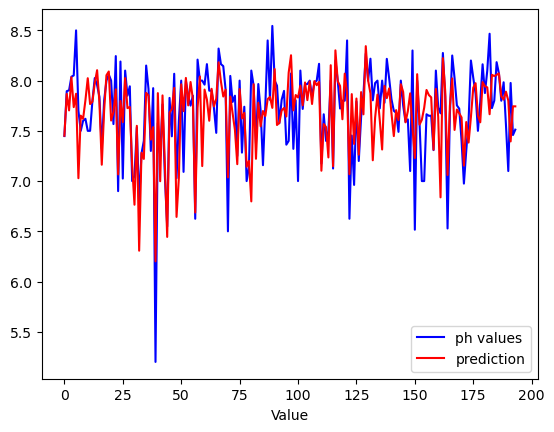

In [113]:
plt.plot(range(len(y_val)),y_val,'b',label='ph values')
plt.plot(range(len(y_pred_pH)),y_pred_pH,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [114]:
diff_pH = y_pred_pH - y_val

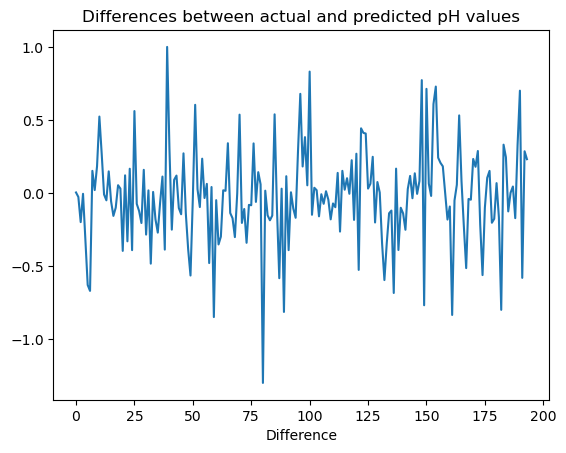

In [115]:
plt.plot(range(len(diff_pH)),diff_pH)
plt.title('Differences between actual and predicted pH values')
plt.xlabel('Sample')
plt.xlabel('Difference');

#### Getting Nitrate Value

In [116]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Totalcaliform']]

In [117]:
X.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Totalcaliform
0,9.0,9.0,8.0,85.0,0.1,397.0
1,10.0,9.0,8.0,102.0,0.3,954.0
2,11.0,9.0,8.0,96.0,0.2,653.0
3,13.0,9.0,8.0,94.0,0.2,317.0
4,14.0,10.0,8.0,112.0,0.2,1072.0


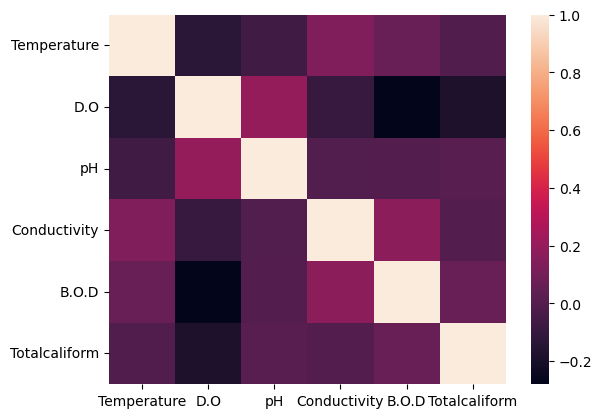

In [118]:
sns.heatmap(X.corr());

In [119]:
y = df_new['Nitrate']

In [120]:
y.value_counts()

Nitrate
4.000000     42
3.000000     41
1.380000     34
2.000000     27
1.711670     19
             ..
2.842445      1
2.806900      1
1.875483      1
1.888775      1
30.000000     1
Name: count, Length: 674, dtype: int64

In [121]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [122]:
X_train.shape

(773, 6)

In [123]:
y_train.shape

(773,)

In [124]:
X_val.shape

(194, 6)

In [125]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

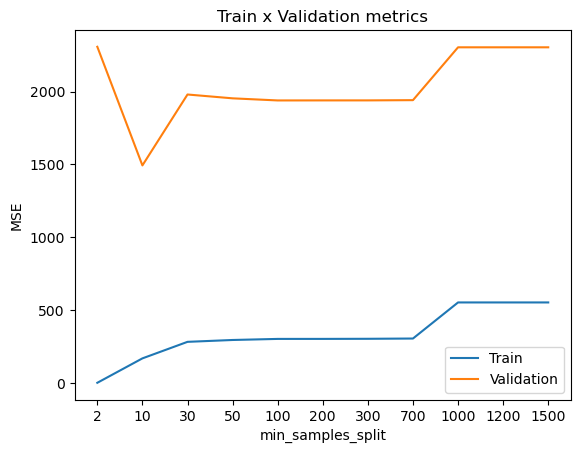

In [126]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [127]:
min_samples_split_list = np.arange(2,30)

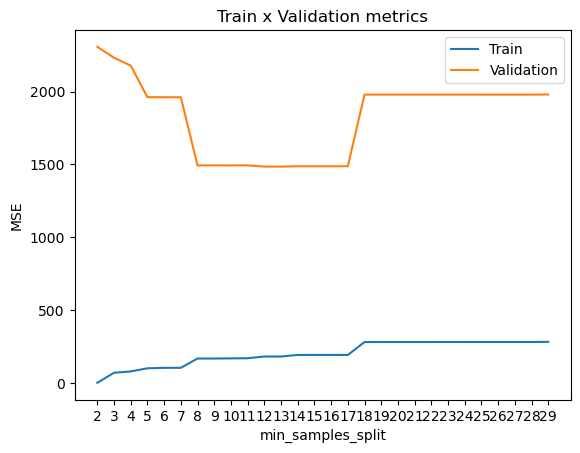

In [128]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [129]:
min_samples_split_list = np.arange(7,20)

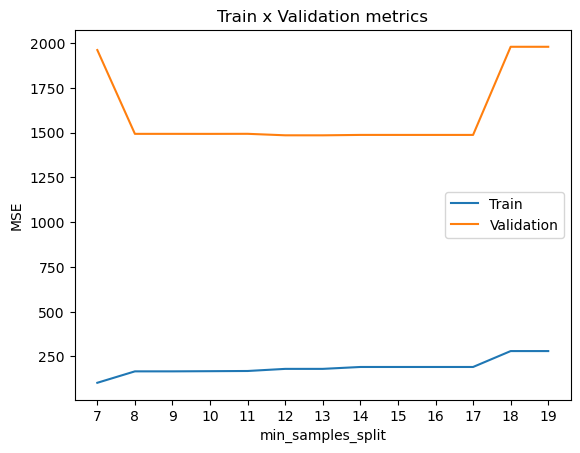

In [130]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [131]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

6

In [132]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

13

In [133]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

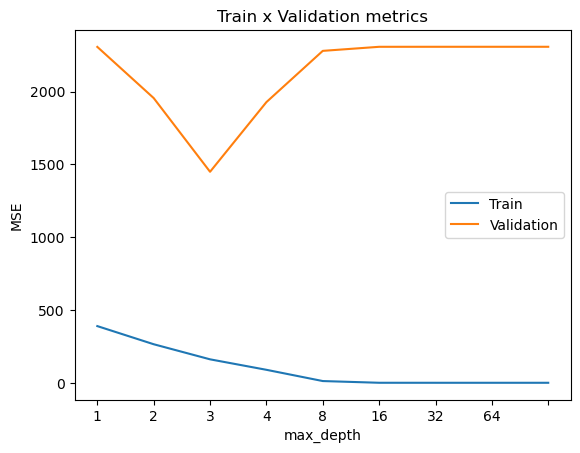

In [134]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 3
    Chosen min_samples_split = 13

In [135]:
decision_tree_nitr_model = DecisionTreeRegressor(min_samples_split = 13,
                                             max_depth = 3,
                                             random_state = 123).fit(X_train,y_train)

In [136]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 215.4973
MSE for validation:
	MSE: 1449.2868


In [137]:
y_pred_nitr = decision_tree_nitr_model.predict(X_val)

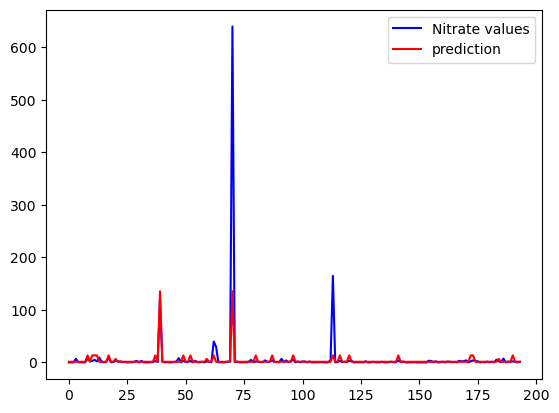

In [138]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [139]:
diff_nitr = y_pred_nitr - y_val

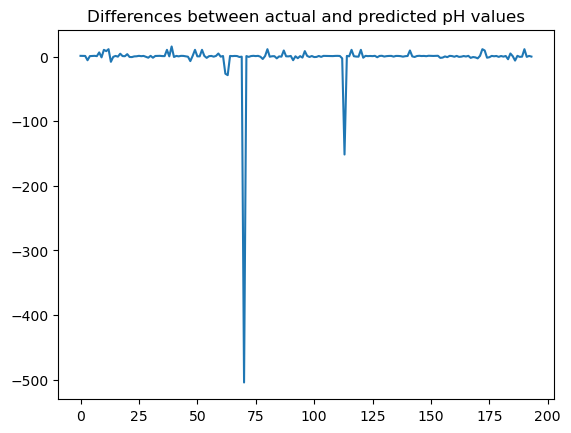

In [140]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

In [141]:
decision_tree_nitr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [142]:
degree_list = np.arange(1,5)

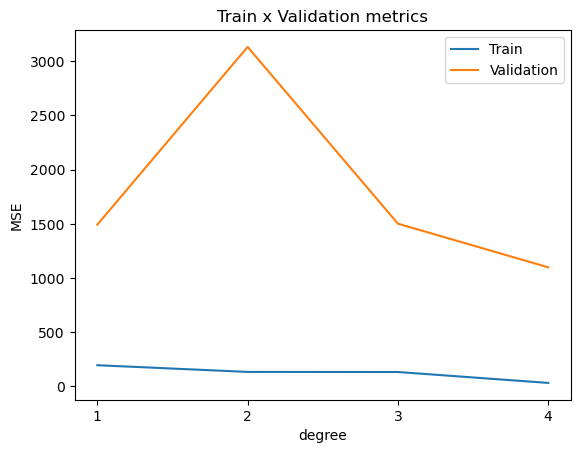

In [143]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 10,
                                  max_depth = 6,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [144]:
MSE_list_val

[1492.5582918562636,
 3132.1135956094645,
 1501.5706671397156,
 1098.8503438678115]

In [145]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

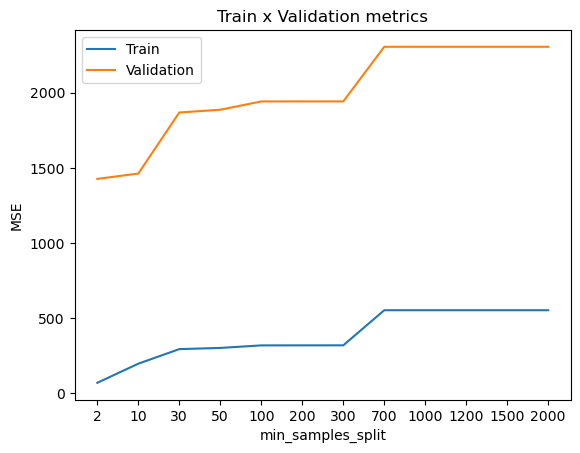

In [146]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [147]:
min_samples_split_list = np.arange(2,11)

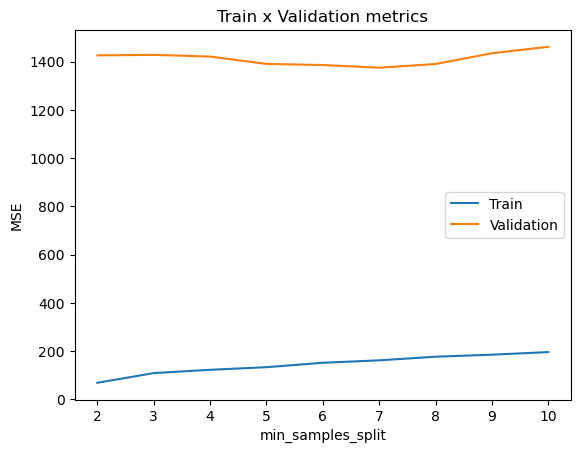

In [148]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [149]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

5

In [150]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

7

In [151]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

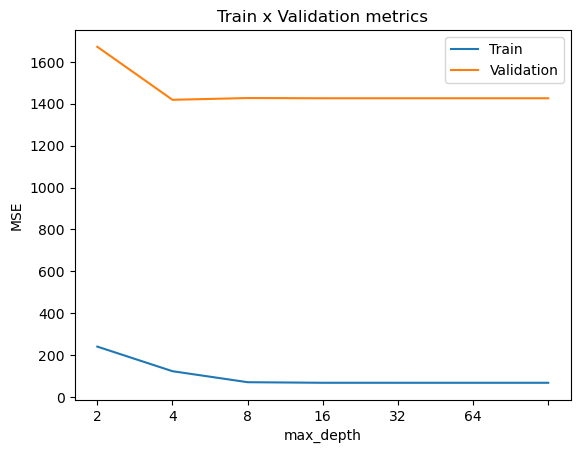

In [152]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [153]:
MSE_list_val

[1670.9898320871157,
 1418.2308339379058,
 1426.6334886784455,
 1425.602448664635,
 1425.594997712932,
 1425.5953247611526,
 1425.5953247611526]

In [154]:
max_depth_list = np.arange(8,33)

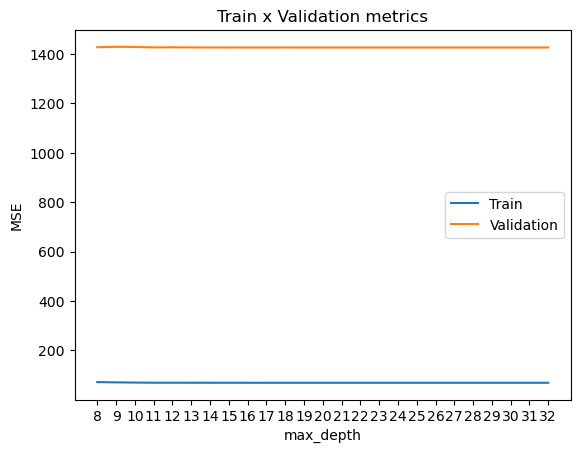

In [155]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [156]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

17

In [157]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

25

In [158]:
n_estimators_list = [10,50,100,500,1000,2000]

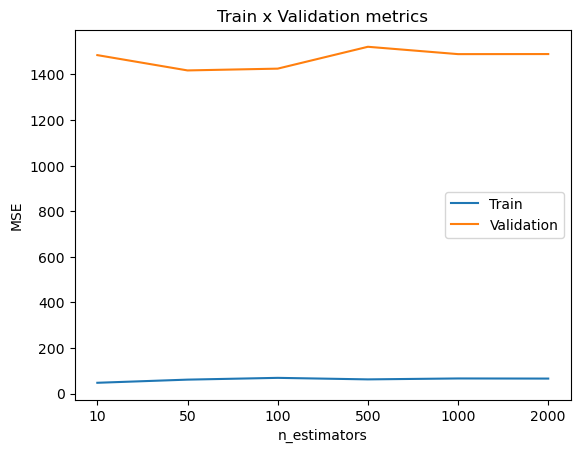

In [159]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [160]:
n_estimators_list = np.arange(10,100,5)

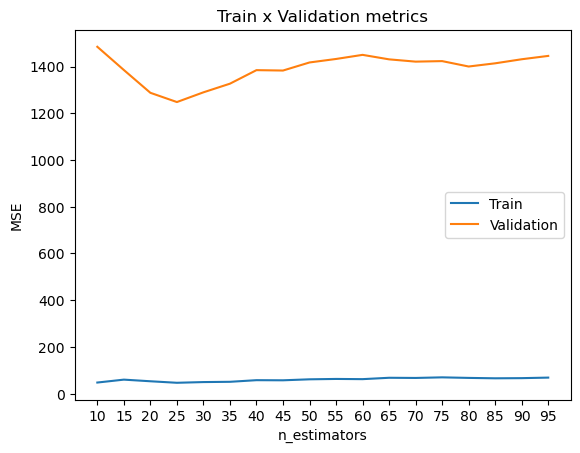

In [161]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [162]:
MSE_list_val

[1484.8966722670145,
 1385.511131178504,
 1287.9075817728335,
 1248.3109864643377,
 1289.9177863799018,
 1326.9351763773477,
 1384.886591109946,
 1383.1919447016583,
 1417.7652094019156,
 1432.7292065239926,
 1450.3241065725535,
 1431.0775883567862,
 1421.3187788552707,
 1423.5615926606724,
 1400.4292000258395,
 1414.1197566715973,
 1431.514089288314,
 1445.8430953609154]

In [163]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

3

In [164]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

25

    Chosen max_depth = 25
    Chosen n_estimators = 25
    Chosen min_samples_split = 7

In [165]:
random_forest_nitr_model = RandomForestRegressor(n_estimators = 25,
                                             max_depth = 25, 
                                             min_samples_split = 7).fit(X_train,y_train)

In [166]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 161.3562
MSE for validation:
	MSE: 1398.2911


In [167]:
y_pred_nitr = random_forest_nitr_model.predict(X_val)

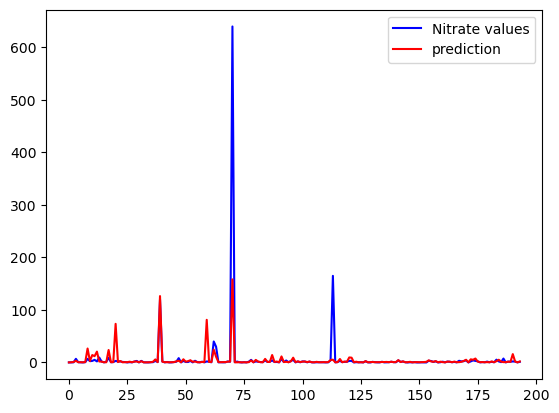

In [168]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [169]:
diff_nitr = y_pred_nitr - y_val

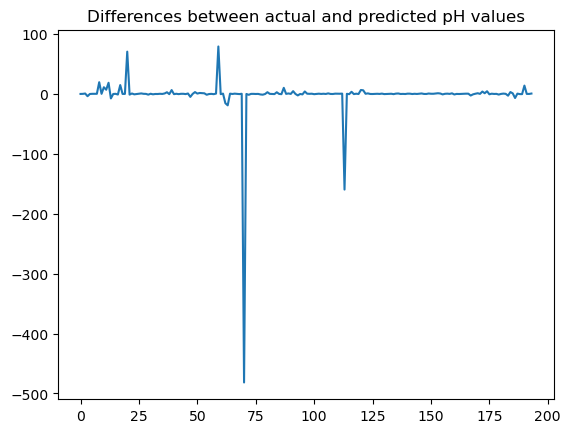

In [170]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

In [171]:
degree_list = np.arange(1,5)

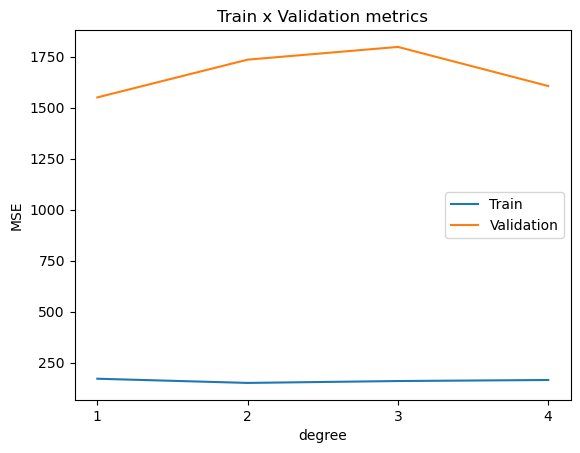

In [172]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = RandomForestRegressor(n_estimators = 25,
                                  max_depth = 25,
                                  min_samples_split = 7).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [173]:
MSE_list_val

[1550.2006766896227, 1735.353250556957, 1797.7465447427082, 1605.9753099177851]

In [174]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [175]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [176]:
n_estimators_list = [10,50,100,500,1000,2000]

In [177]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[0]	validation_0-rmse:12.21689
[1]	validation_0-rmse:12.24081
[2]	validation_0-rmse:13.79113
[3]	validation_0-rmse:13.36284
[4]	validation_0-rmse:13.21338
[5]	validation_0-rmse:13.29361
[6]	validation_0-rmse:13.53318
[7]	validation_0-rmse:13.84803
[8]	validation_0-rmse:13.91526
[9]	validation_0-rmse:14.02508
[10]	validation_0-rmse:14.11432
[11]	validation_0-rmse:14.21552
[12]	validation_0-rmse:14.37288
[13]	validation_0-rmse:14.44311
[14]	validation_0-rmse:14.53206
[15]	validation_0-rmse:14.65584
[16]	validation_0-rmse:14.74246
[17]	validation_0-rmse:14.78937
[18]	validation_0-rmse:14.86153
[19]	validation_0-rmse:14.90303
[20]	validation_0-rmse:14.96905
[21]	validation_0-rmse:14.97

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	vali

[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	validation_0-rmse:14.98636
[129]	valid

[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	validation_0-rmse:14.98633
[378]	vali

[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	validation_0-rmse:14.98633
[626]	validation_0-rmse:14.98633
[627]	vali

[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	validation_0-rmse:14.98633
[875]	validation_0-rmse:14.98633
[876]	vali

[98]	validation_0-rmse:14.98742
[99]	validation_0-rmse:14.98727
[100]	validation_0-rmse:14.98743
[101]	validation_0-rmse:14.98730
[102]	validation_0-rmse:14.98711
[103]	validation_0-rmse:14.98691
[104]	validation_0-rmse:14.98645
[105]	validation_0-rmse:14.98602
[106]	validation_0-rmse:14.98567
[107]	validation_0-rmse:14.98556
[108]	validation_0-rmse:14.98608
[109]	validation_0-rmse:14.98593
[110]	validation_0-rmse:14.98637
[111]	validation_0-rmse:14.98615
[112]	validation_0-rmse:14.98640
[113]	validation_0-rmse:14.98685
[114]	validation_0-rmse:14.98707
[115]	validation_0-rmse:14.98643
[116]	validation_0-rmse:14.98620
[117]	validation_0-rmse:14.98621
[118]	validation_0-rmse:14.98619
[119]	validation_0-rmse:14.98658
[120]	validation_0-rmse:14.98662
[121]	validation_0-rmse:14.98651
[122]	validation_0-rmse:14.98722
[123]	validation_0-rmse:14.98746
[124]	validation_0-rmse:14.98665
[125]	validation_0-rmse:14.98662
[126]	validation_0-rmse:14.98672
[127]	validation_0-rmse:14.98668
[128]	valida

[347]	validation_0-rmse:14.98633
[348]	validation_0-rmse:14.98633
[349]	validation_0-rmse:14.98633
[350]	validation_0-rmse:14.98633
[351]	validation_0-rmse:14.98633
[352]	validation_0-rmse:14.98633
[353]	validation_0-rmse:14.98633
[354]	validation_0-rmse:14.98633
[355]	validation_0-rmse:14.98633
[356]	validation_0-rmse:14.98633
[357]	validation_0-rmse:14.98633
[358]	validation_0-rmse:14.98633
[359]	validation_0-rmse:14.98633
[360]	validation_0-rmse:14.98633
[361]	validation_0-rmse:14.98633
[362]	validation_0-rmse:14.98633
[363]	validation_0-rmse:14.98633
[364]	validation_0-rmse:14.98633
[365]	validation_0-rmse:14.98633
[366]	validation_0-rmse:14.98633
[367]	validation_0-rmse:14.98633
[368]	validation_0-rmse:14.98633
[369]	validation_0-rmse:14.98633
[370]	validation_0-rmse:14.98633
[371]	validation_0-rmse:14.98633
[372]	validation_0-rmse:14.98633
[373]	validation_0-rmse:14.98633
[374]	validation_0-rmse:14.98633
[375]	validation_0-rmse:14.98633
[376]	validation_0-rmse:14.98633
[377]	vali

[596]	validation_0-rmse:14.98633
[597]	validation_0-rmse:14.98633
[598]	validation_0-rmse:14.98633
[599]	validation_0-rmse:14.98633
[600]	validation_0-rmse:14.98633
[601]	validation_0-rmse:14.98633
[602]	validation_0-rmse:14.98633
[603]	validation_0-rmse:14.98633
[604]	validation_0-rmse:14.98633
[605]	validation_0-rmse:14.98633
[606]	validation_0-rmse:14.98633
[607]	validation_0-rmse:14.98633
[608]	validation_0-rmse:14.98633
[609]	validation_0-rmse:14.98633
[610]	validation_0-rmse:14.98633
[611]	validation_0-rmse:14.98633
[612]	validation_0-rmse:14.98633
[613]	validation_0-rmse:14.98633
[614]	validation_0-rmse:14.98633
[615]	validation_0-rmse:14.98633
[616]	validation_0-rmse:14.98633
[617]	validation_0-rmse:14.98633
[618]	validation_0-rmse:14.98633
[619]	validation_0-rmse:14.98633
[620]	validation_0-rmse:14.98633
[621]	validation_0-rmse:14.98633
[622]	validation_0-rmse:14.98633
[623]	validation_0-rmse:14.98633
[624]	validation_0-rmse:14.98633
[625]	validation_0-rmse:14.98633
[626]	vali

[845]	validation_0-rmse:14.98633
[846]	validation_0-rmse:14.98633
[847]	validation_0-rmse:14.98633
[848]	validation_0-rmse:14.98633
[849]	validation_0-rmse:14.98633
[850]	validation_0-rmse:14.98633
[851]	validation_0-rmse:14.98633
[852]	validation_0-rmse:14.98633
[853]	validation_0-rmse:14.98633
[854]	validation_0-rmse:14.98633
[855]	validation_0-rmse:14.98633
[856]	validation_0-rmse:14.98633
[857]	validation_0-rmse:14.98633
[858]	validation_0-rmse:14.98633
[859]	validation_0-rmse:14.98633
[860]	validation_0-rmse:14.98633
[861]	validation_0-rmse:14.98633
[862]	validation_0-rmse:14.98633
[863]	validation_0-rmse:14.98633
[864]	validation_0-rmse:14.98633
[865]	validation_0-rmse:14.98633
[866]	validation_0-rmse:14.98633
[867]	validation_0-rmse:14.98633
[868]	validation_0-rmse:14.98633
[869]	validation_0-rmse:14.98633
[870]	validation_0-rmse:14.98633
[871]	validation_0-rmse:14.98633
[872]	validation_0-rmse:14.98633
[873]	validation_0-rmse:14.98633
[874]	validation_0-rmse:14.98633
[875]	vali

[1091]	validation_0-rmse:14.98633
[1092]	validation_0-rmse:14.98633
[1093]	validation_0-rmse:14.98633
[1094]	validation_0-rmse:14.98633
[1095]	validation_0-rmse:14.98633
[1096]	validation_0-rmse:14.98633
[1097]	validation_0-rmse:14.98633
[1098]	validation_0-rmse:14.98633
[1099]	validation_0-rmse:14.98633
[1100]	validation_0-rmse:14.98633
[1101]	validation_0-rmse:14.98633
[1102]	validation_0-rmse:14.98633
[1103]	validation_0-rmse:14.98633
[1104]	validation_0-rmse:14.98633
[1105]	validation_0-rmse:14.98633
[1106]	validation_0-rmse:14.98633
[1107]	validation_0-rmse:14.98633
[1108]	validation_0-rmse:14.98633
[1109]	validation_0-rmse:14.98633
[1110]	validation_0-rmse:14.98633
[1111]	validation_0-rmse:14.98633
[1112]	validation_0-rmse:14.98633
[1113]	validation_0-rmse:14.98633
[1114]	validation_0-rmse:14.98633
[1115]	validation_0-rmse:14.98633
[1116]	validation_0-rmse:14.98633
[1117]	validation_0-rmse:14.98633
[1118]	validation_0-rmse:14.98633
[1119]	validation_0-rmse:14.98633
[1120]	validat

[1332]	validation_0-rmse:14.98633
[1333]	validation_0-rmse:14.98633
[1334]	validation_0-rmse:14.98633
[1335]	validation_0-rmse:14.98633
[1336]	validation_0-rmse:14.98633
[1337]	validation_0-rmse:14.98633
[1338]	validation_0-rmse:14.98633
[1339]	validation_0-rmse:14.98633
[1340]	validation_0-rmse:14.98633
[1341]	validation_0-rmse:14.98633
[1342]	validation_0-rmse:14.98633
[1343]	validation_0-rmse:14.98633
[1344]	validation_0-rmse:14.98633
[1345]	validation_0-rmse:14.98633
[1346]	validation_0-rmse:14.98633
[1347]	validation_0-rmse:14.98633
[1348]	validation_0-rmse:14.98633
[1349]	validation_0-rmse:14.98633
[1350]	validation_0-rmse:14.98633
[1351]	validation_0-rmse:14.98633
[1352]	validation_0-rmse:14.98633
[1353]	validation_0-rmse:14.98633
[1354]	validation_0-rmse:14.98633
[1355]	validation_0-rmse:14.98633
[1356]	validation_0-rmse:14.98633
[1357]	validation_0-rmse:14.98633
[1358]	validation_0-rmse:14.98633
[1359]	validation_0-rmse:14.98633
[1360]	validation_0-rmse:14.98633
[1361]	validat

[1573]	validation_0-rmse:14.98633
[1574]	validation_0-rmse:14.98633
[1575]	validation_0-rmse:14.98633
[1576]	validation_0-rmse:14.98633
[1577]	validation_0-rmse:14.98633
[1578]	validation_0-rmse:14.98633
[1579]	validation_0-rmse:14.98633
[1580]	validation_0-rmse:14.98633
[1581]	validation_0-rmse:14.98633
[1582]	validation_0-rmse:14.98633
[1583]	validation_0-rmse:14.98633
[1584]	validation_0-rmse:14.98633
[1585]	validation_0-rmse:14.98633
[1586]	validation_0-rmse:14.98633
[1587]	validation_0-rmse:14.98633
[1588]	validation_0-rmse:14.98633
[1589]	validation_0-rmse:14.98633
[1590]	validation_0-rmse:14.98633
[1591]	validation_0-rmse:14.98633
[1592]	validation_0-rmse:14.98633
[1593]	validation_0-rmse:14.98633
[1594]	validation_0-rmse:14.98633
[1595]	validation_0-rmse:14.98633
[1596]	validation_0-rmse:14.98633
[1597]	validation_0-rmse:14.98633
[1598]	validation_0-rmse:14.98633
[1599]	validation_0-rmse:14.98633
[1600]	validation_0-rmse:14.98633
[1601]	validation_0-rmse:14.98633
[1602]	validat

[1814]	validation_0-rmse:14.98633
[1815]	validation_0-rmse:14.98633
[1816]	validation_0-rmse:14.98633
[1817]	validation_0-rmse:14.98633
[1818]	validation_0-rmse:14.98633
[1819]	validation_0-rmse:14.98633
[1820]	validation_0-rmse:14.98633
[1821]	validation_0-rmse:14.98633
[1822]	validation_0-rmse:14.98633
[1823]	validation_0-rmse:14.98633
[1824]	validation_0-rmse:14.98633
[1825]	validation_0-rmse:14.98633
[1826]	validation_0-rmse:14.98633
[1827]	validation_0-rmse:14.98633
[1828]	validation_0-rmse:14.98633
[1829]	validation_0-rmse:14.98633
[1830]	validation_0-rmse:14.98633
[1831]	validation_0-rmse:14.98633
[1832]	validation_0-rmse:14.98633
[1833]	validation_0-rmse:14.98633
[1834]	validation_0-rmse:14.98633
[1835]	validation_0-rmse:14.98633
[1836]	validation_0-rmse:14.98633
[1837]	validation_0-rmse:14.98633
[1838]	validation_0-rmse:14.98633
[1839]	validation_0-rmse:14.98633
[1840]	validation_0-rmse:14.98633
[1841]	validation_0-rmse:14.98633
[1842]	validation_0-rmse:14.98633
[1843]	validat

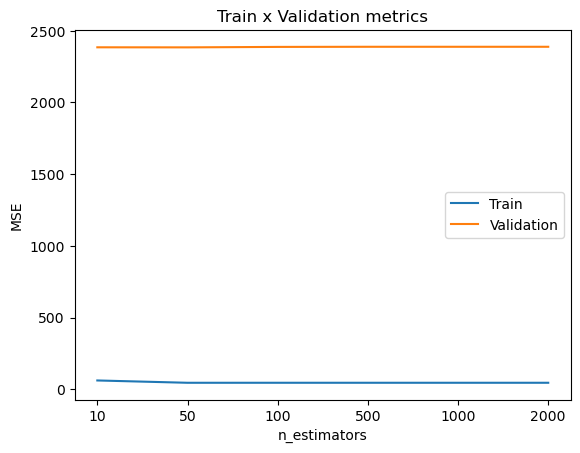

In [178]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [179]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

1

In [180]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

50

In [181]:
xgb_nitr_model = XGBRegressor(n_estimators = 50, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_nitr_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:13.93140
[1]	validation_0-rmse:12.98431
[2]	validation_0-rmse:12.32372
[3]	validation_0-rmse:12.03309
[4]	validation_0-rmse:12.01539
[5]	validation_0-rmse:11.26233
[6]	validation_0-rmse:10.66939
[7]	validation_0-rmse:10.11149
[8]	validation_0-rmse:9.71602
[9]	validation_0-rmse:9.39169
[10]	validation_0-rmse:9.08334
[11]	validation_0-rmse:8.89324
[12]	validation_0-rmse:8.74045
[13]	validation_0-rmse:8.61906
[14]	validation_0-rmse:8.61240
[15]	validation_0-rmse:8.56452
[16]	validation_0-rmse:8.58254
[17]	validation_0-rmse:8.58610
[18]	validation_0-rmse:8.64058
[19]	validation_0-rmse:8.69108
[20]	validation_0-rmse:8.75610
[21]	validation_0-rmse:8.83131
[22]	validation_0-rmse:8.91451
[23]	validation_0-rmse:8.98914
[24]	validation_0-rmse:9.00842
[25]	validation_0-rmse:9.03770
[26]	validation_0-rmse:9.09145
[27]	validation_0-rmse:9.14101
[28]	validation_0-rmse:9.19462
[29]	validation_0-rmse:9.24784
[30]	validation_0-rmse:9.31358
[31]	validation_0-rmse:9.37342
[32]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [182]:
xgb_nitr_model.best_iteration

49

In [183]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_nitr_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_nitr_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 31.7594
MSE for validation:
	MSE: 2298.7988


In [184]:
y_pred_nitr = xgb_nitr_model.predict(X_val)

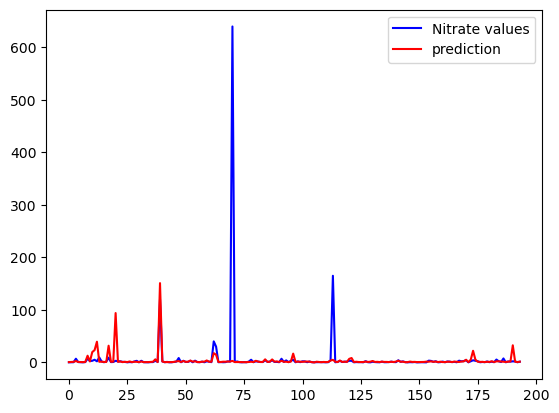

In [185]:
plt.plot(range(len(y_val)),y_val,'b',label='Nitrate values')
plt.plot(range(len(y_pred_nitr)),y_pred_nitr,'r',label='prediction')
plt.legend(loc='best');

In [186]:
diff_nitr = y_pred_nitr - y_val

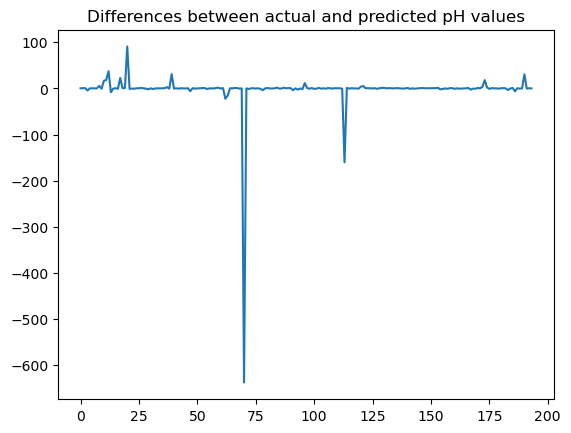

In [187]:
plt.plot(range(len(diff_nitr)),diff_nitr)
plt.title('Differences between actual and predicted pH values');

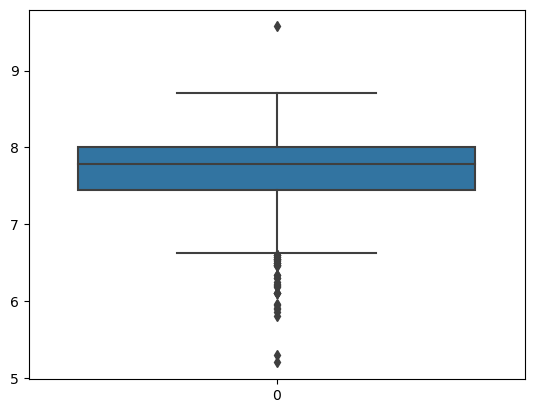

In [188]:
sns.boxplot(df['pH']);

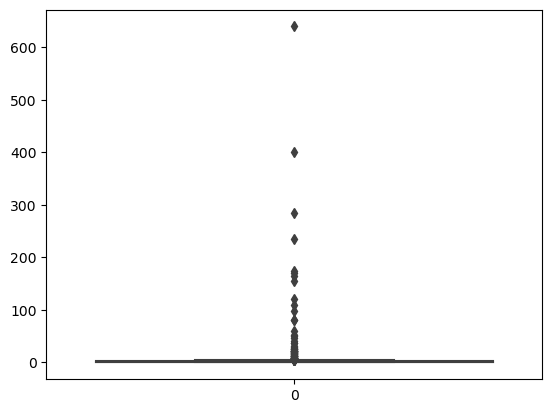

In [189]:
sns.boxplot(df['Nitrate']);

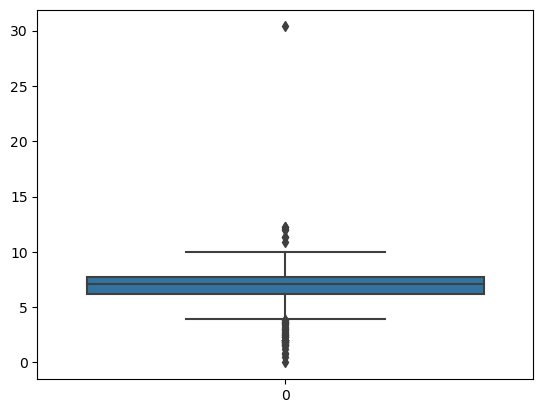

In [190]:
sns.boxplot(df['D.O']);

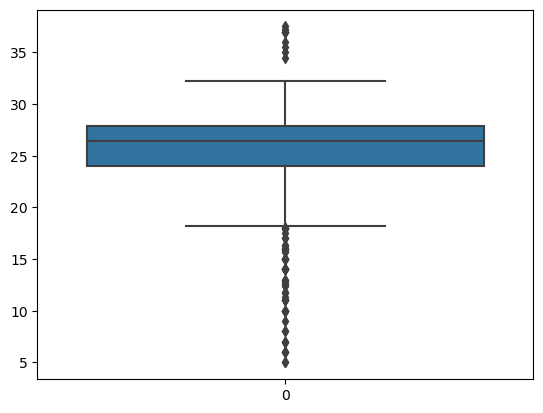

In [191]:
sns.boxplot(df['Temperature']);

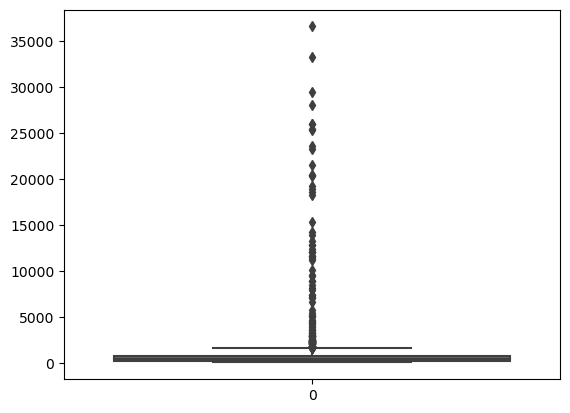

In [192]:
sns.boxplot(df['Conductivity']);

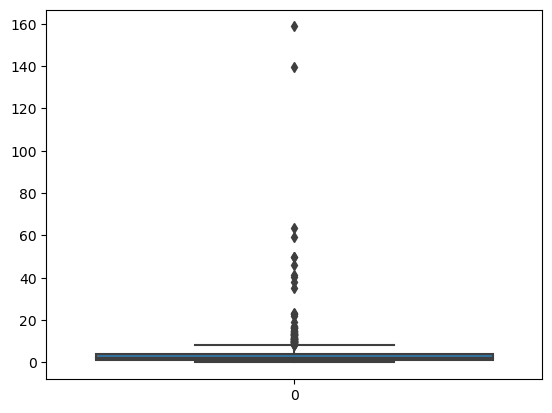

In [193]:
sns.boxplot(df['B.O.D']);

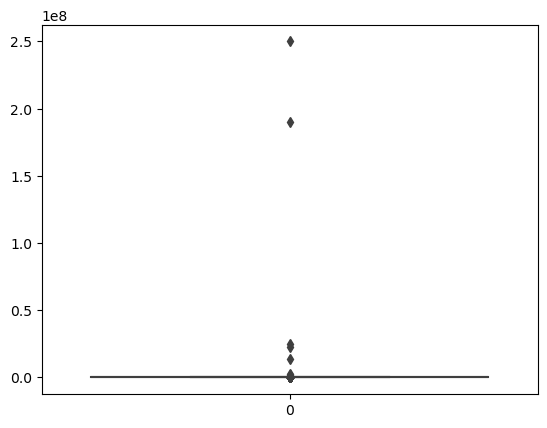

In [194]:
sns.boxplot(df['Totalcaliform']);

#### Getting D.O Value

In [195]:
X = df.loc[:,['Temperature','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [196]:
X.head()

,Temperature,pH,Conductivity,B.O.D,Nitrate,Totalcaliform
0,9.0,8.0,85.0,0.1,0.2,397.0
1,10.0,8.0,102.0,0.3,0.4,954.0
2,11.0,8.0,96.0,0.2,0.3,653.0
3,13.0,8.0,94.0,0.2,0.4,317.0
4,14.0,8.0,112.0,0.2,0.5,1072.0


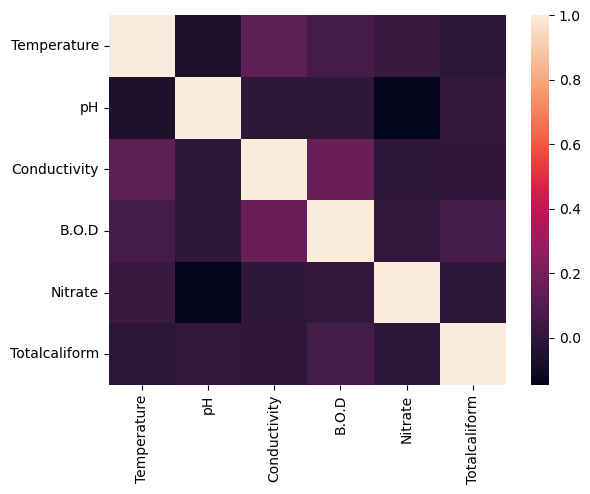

In [197]:
sns.heatmap(X.corr());

In [198]:
y = df_new['D.O']

In [199]:
y.value_counts()

D.O
8.000000    36
7.600000    26
7.700000    21
9.000000    20
7.300000    19
            ..
6.166667     1
6.188889     1
5.224000     1
5.844444     1
7.290000     1
Name: count, Length: 540, dtype: int64

In [200]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [201]:
X_train.shape

(773, 6)

In [202]:
y_train.shape

(773,)

In [203]:
X_val.shape

(194, 6)

In [204]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500]

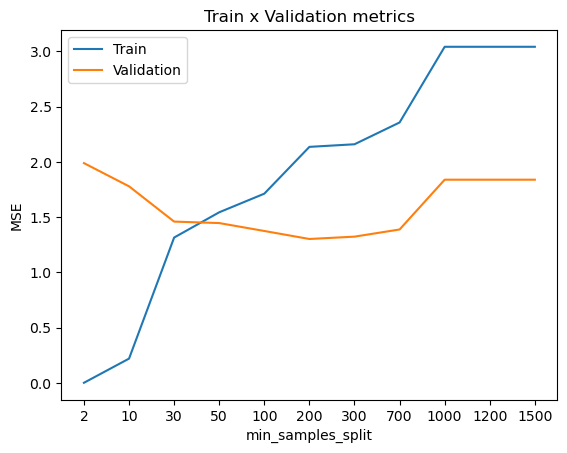

In [205]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [206]:
min_samples_split_list = np.arange(100,300,10)

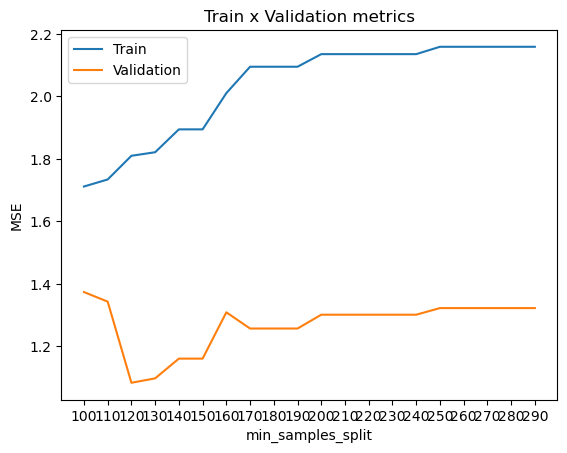

In [207]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [208]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

2

In [209]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

120

In [210]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

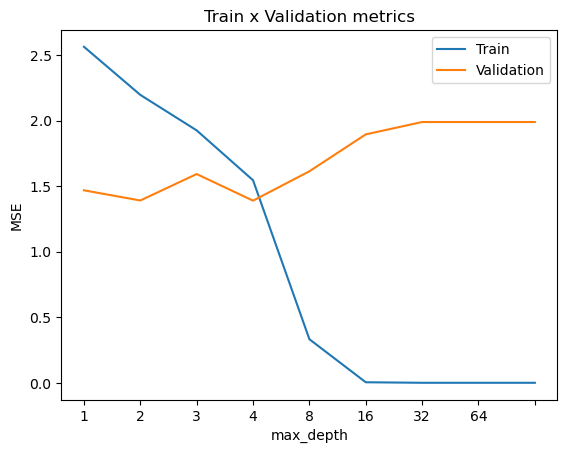

In [211]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [212]:
max_depth_list = np.arange(3,10)

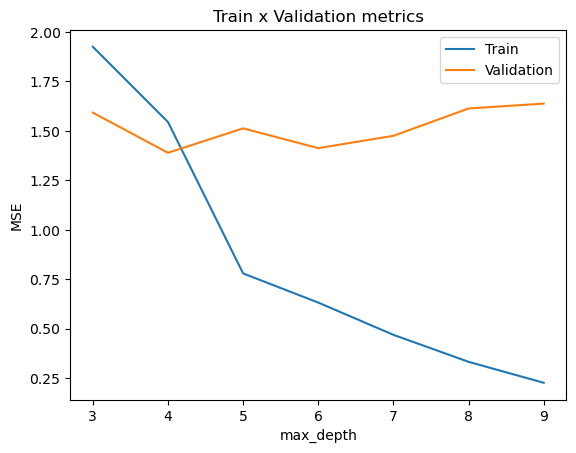

In [213]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

    Chosen max_depth = 4
    Chosen min_samples_split = 120

In [214]:
decision_tree_do_model = DecisionTreeRegressor(min_samples_split = 120,
                                             max_depth = 4,
                                             random_state = 123).fit(X_train,y_train)

In [215]:
print(f"MSE for train:\n\tMSE: {MSE(decision_tree_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(decision_tree_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 1.9662
MSE for validation:
	MSE: 1.2626


In [216]:
y_pred_do = decision_tree_do_model.predict(X_val)

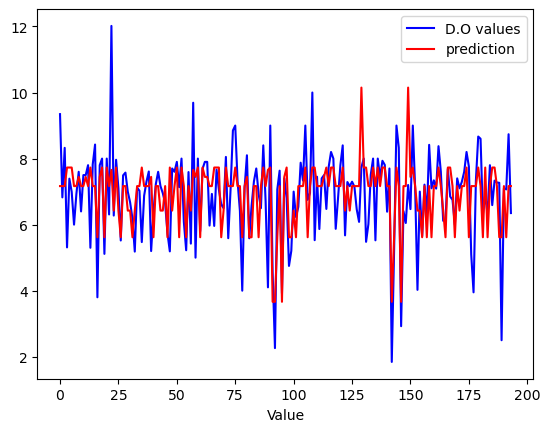

In [217]:
plt.plot(range(len(y_val)),y_val,'b',label='D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [218]:
diff_do = y_pred_do - y_val

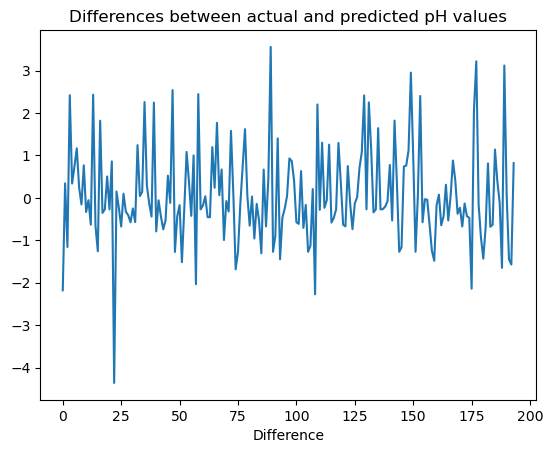

In [219]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences between actual and predicted pH values')
plt.xlabel('Sample')
plt.xlabel('Difference');

In [220]:
decision_tree_do_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 120,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [221]:
degree_list = np.arange(1,5)

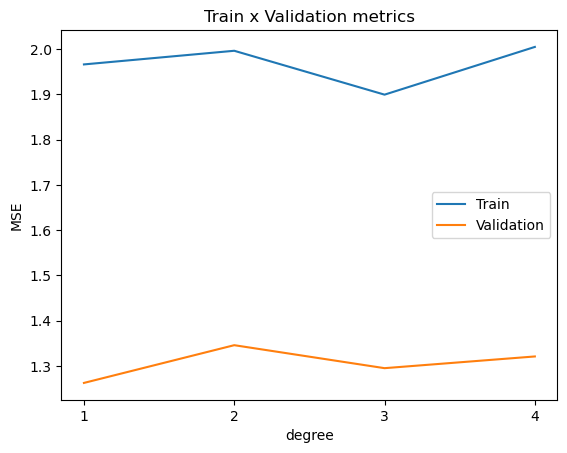

In [222]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = DecisionTreeRegressor(min_samples_split = 120,
                                  max_depth = 4,
                                  random_state = 123).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [223]:
MSE_list_val

[1.262601665317575, 1.3459699031971502, 1.2951933809737834, 1.321072458422356]

In [224]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000, 1200, 1500, 2000]

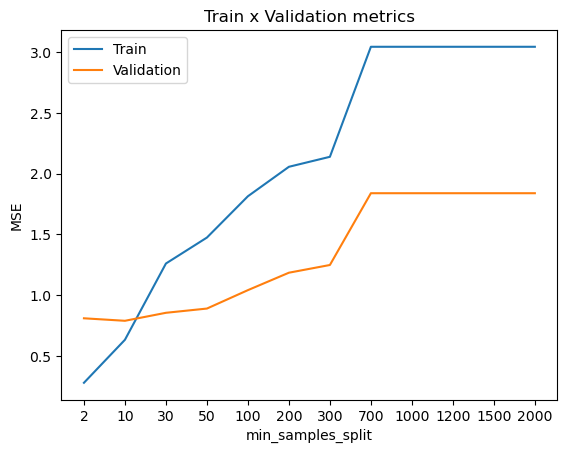

In [225]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [226]:
min_samples_split_list = np.arange(2,30)

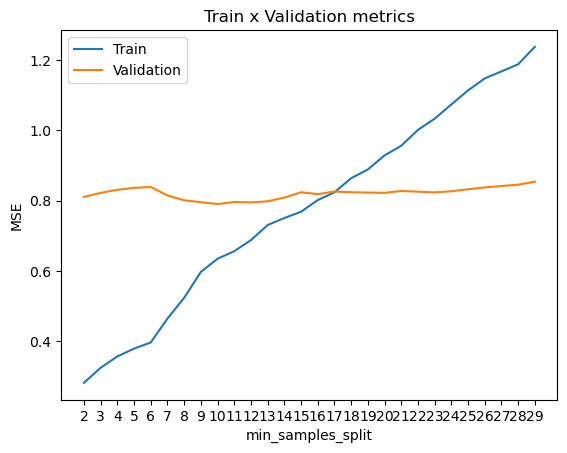

In [227]:
MSE_list_train = []
MSE_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [228]:
ind_min_samp_split = np.argmin(MSE_list_val)
ind_min_samp_split

8

In [229]:
best_min_samp_split = min_samples_split_list[ind_min_samp_split]
best_min_samp_split

10

In [230]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

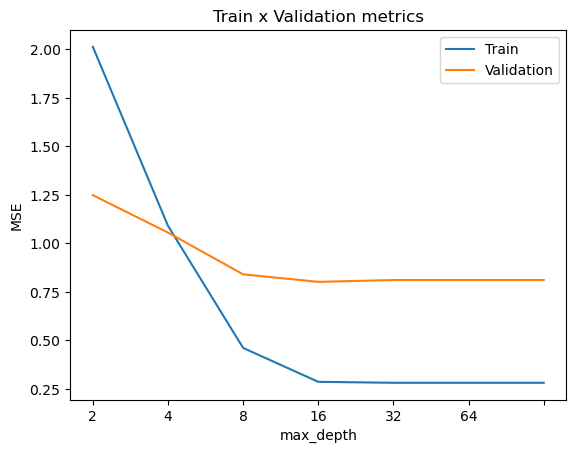

In [231]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [232]:
MSE_list_val

[1.2482090911994308,
 1.0553975116896588,
 0.839875896727465,
 0.8011774587514319,
 0.8106520187951638,
 0.8106520187951638,
 0.8106520187951638]

In [233]:
max_depth_list = np.arange(8,33)

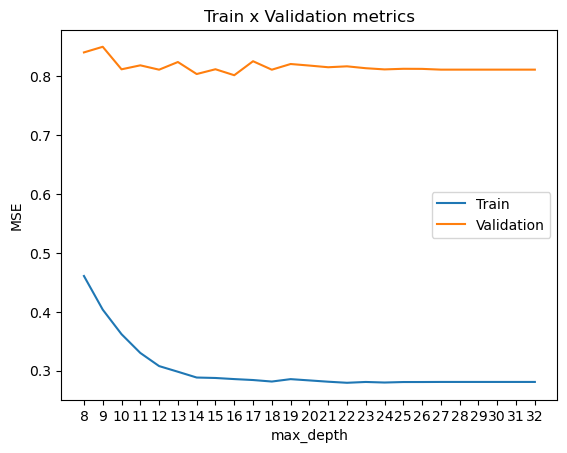

In [234]:
MSE_list_train = []
MSE_list_val = []
for max_depth in max_depth_list:
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [235]:
ind_max_depth = np.argmin(MSE_list_val)
ind_max_depth

8

In [236]:
best_max_depth = max_depth_list[ind_max_depth]
best_max_depth

16

In [237]:
n_estimators_list = [10,50,100,500,1000,2000]

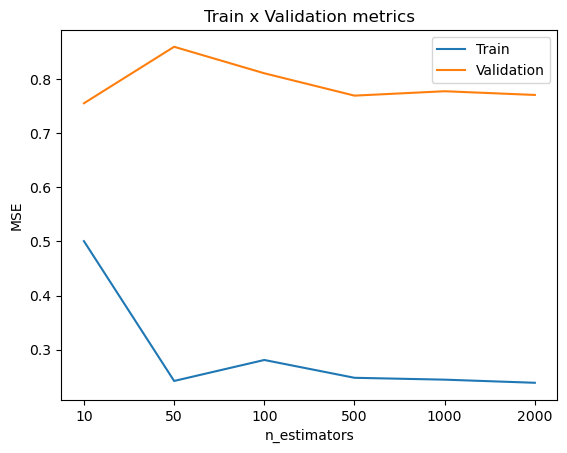

In [238]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [239]:
MSE_list_val

[0.7552665613766872,
 0.8596260389711765,
 0.8106520187951638,
 0.7693538111288876,
 0.7774729023954382,
 0.7706057445398652]

In [240]:
n_estimators_list = np.arange(5,50,5)

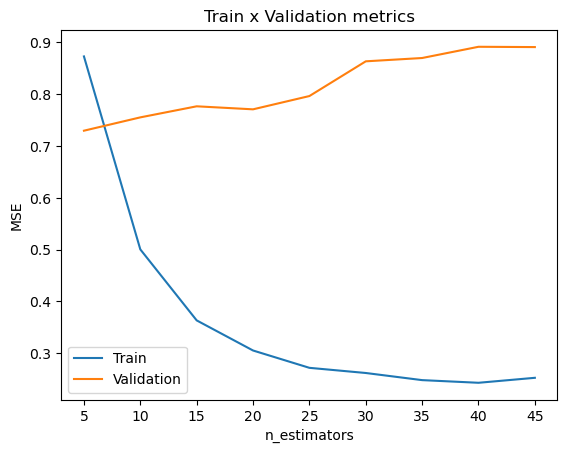

In [241]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [242]:
n_estimators_list = np.arange(1,11)

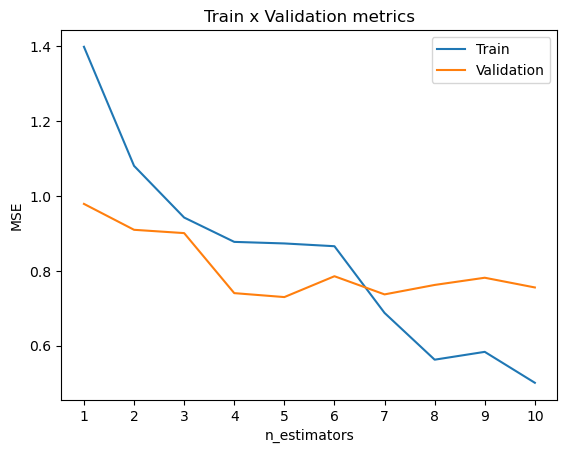

In [243]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [244]:
MSE_list_val

[0.9786839097526889,
 0.9094041784559069,
 0.9005716625669044,
 0.7400877952005849,
 0.7295463366715033,
 0.7852623123113541,
 0.7367120197855456,
 0.7619830892011316,
 0.7812399031111564,
 0.7552665613766872]

In [245]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

4

In [246]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

5

    Chosen max_depth = 16
    Chosen n_estimators = 5
    Chosen min_samples_split = 10

In [247]:
random_forest_do_model = RandomForestRegressor(n_estimators = 5,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [248]:
print(f"MSE for train:\n\tMSE: {MSE(random_forest_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(random_forest_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.7710
MSE for validation:
	MSE: 0.9798


In [249]:
y_pred_do = random_forest_do_model.predict(X_val)

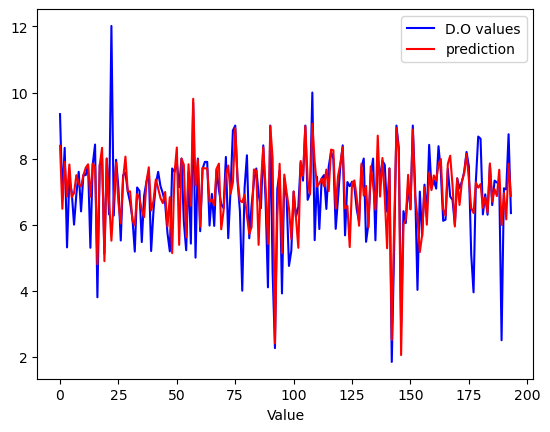

In [250]:
plt.plot(range(len(y_val)),y_val,'b',label='D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [251]:
diff_do = y_pred_do - y_val

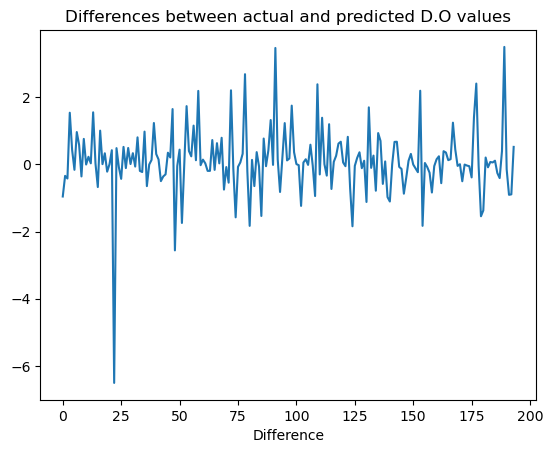

In [252]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences between actual and predicted D.O values')
plt.xlabel('Sample')
plt.xlabel('Difference');

In [253]:
degree_list = np.arange(1,5)

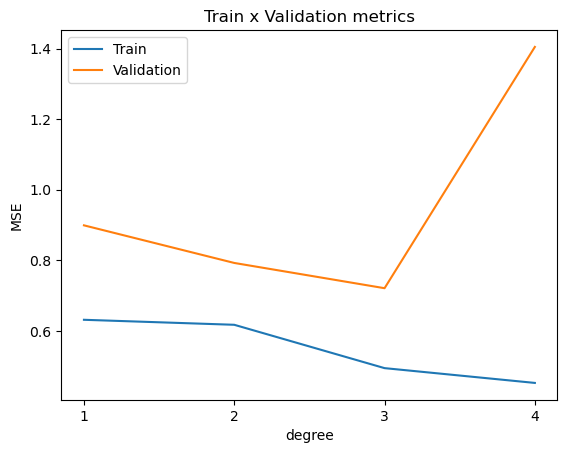

In [254]:
MSE_list_train = []
MSE_list_val = []
for degree in degree_list:
    transformer = PolynomialFeatures(degree).fit(X_train)
    X_poly = transformer.transform(X_train)
    X_poly = X_poly[:,1:]
    model = RandomForestRegressor(n_estimators = 5,
                                  max_depth = 16,
                                  min_samples_split = 10).fit(X_poly,y_train) 
    predictions_train = model.predict(X_poly)
    X_val_poly = transformer.transform(X_val)
    X_val_poly = X_val_poly[:,1:]
    predictions_val = model.predict(X_val_poly)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

plt.title('Train x Validation metrics')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(degree_list )),labels=degree_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [255]:
MSE_list_val

[0.899214489068203, 0.7926479947509959, 0.7210891850135245, 1.4047425183742808]

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, train_size = 0.8, random_state = 123)

In [257]:
n = int(len(X_train)*0.8) ## Using 80% to train and 20% to eval

In [258]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [259]:
n_estimators_list = [10,50,100,500,1000,2000]

In [260]:
MSE_list_train = []
MSE_list_val = []
for n_estimators in n_estimators_list:
    model = XGBRegressor(n_estimators = n_estimators, verbosity = 0,random_state = 123)
    model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)]) 
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    MSE_train = MSE(predictions_train,y_train)
    MSE_val = MSE(predictions_val,y_val)
    MSE_list_train.append(MSE_train)
    MSE_list_val.append(MSE_val)

[0]	validation_0-rmse:5.24145
[1]	validation_0-rmse:4.07910
[2]	validation_0-rmse:3.31873
[3]	validation_0-rmse:2.84680
[4]	validation_0-rmse:2.53871
[5]	validation_0-rmse:2.36283
[6]	validation_0-rmse:2.26468
[7]	validation_0-rmse:2.21641
[8]	validation_0-rmse:2.19085
[9]	validation_0-rmse:2.16975
[0]	validation_0-rmse:5.24145
[1]	validation_0-rmse:4.07910
[2]	validation_0-rmse:3.31873
[3]	validation_0-rmse:2.84680
[4]	validation_0-rmse:2.53871
[5]	validation_0-rmse:2.36283
[6]	validation_0-rmse:2.26468
[7]	validation_0-rmse:2.21641
[8]	validation_0-rmse:2.19085
[9]	validation_0-rmse:2.16975
[10]	validation_0-rmse:2.16189
[11]	validation_0-rmse:2.15239
[12]	validation_0-rmse:2.14137
[13]	validation_0-rmse:2.14005
[14]	validation_0-rmse:2.13834
[15]	validation_0-rmse:2.13919
[16]	validation_0-rmse:2.14019
[17]	validation_0-rmse:2.13720
[18]	validation_0-rmse:2.13092
[19]	validation_0-rmse:2.13003
[20]	validation_0-rmse:2.12654
[21]	validation_0-rmse:2.12686
[22]	validation_0-rmse:2.128

[105]	validation_0-rmse:2.11564
[106]	validation_0-rmse:2.11556
[107]	validation_0-rmse:2.11547
[108]	validation_0-rmse:2.11539
[109]	validation_0-rmse:2.11536
[110]	validation_0-rmse:2.11534
[111]	validation_0-rmse:2.11553
[112]	validation_0-rmse:2.11549
[113]	validation_0-rmse:2.11552
[114]	validation_0-rmse:2.11548
[115]	validation_0-rmse:2.11551
[116]	validation_0-rmse:2.11564
[117]	validation_0-rmse:2.11566
[118]	validation_0-rmse:2.11567
[119]	validation_0-rmse:2.11564
[120]	validation_0-rmse:2.11557
[121]	validation_0-rmse:2.11559
[122]	validation_0-rmse:2.11556
[123]	validation_0-rmse:2.11558
[124]	validation_0-rmse:2.11566
[125]	validation_0-rmse:2.11558
[126]	validation_0-rmse:2.11572
[127]	validation_0-rmse:2.11566
[128]	validation_0-rmse:2.11559
[129]	validation_0-rmse:2.11560
[130]	validation_0-rmse:2.11549
[131]	validation_0-rmse:2.11546
[132]	validation_0-rmse:2.11545
[133]	validation_0-rmse:2.11537
[134]	validation_0-rmse:2.11535
[135]	validation_0-rmse:2.11538
[136]	va

[362]	validation_0-rmse:2.11483
[363]	validation_0-rmse:2.11483
[364]	validation_0-rmse:2.11483
[365]	validation_0-rmse:2.11483
[366]	validation_0-rmse:2.11483
[367]	validation_0-rmse:2.11483
[368]	validation_0-rmse:2.11483
[369]	validation_0-rmse:2.11483
[370]	validation_0-rmse:2.11483
[371]	validation_0-rmse:2.11483
[372]	validation_0-rmse:2.11483
[373]	validation_0-rmse:2.11483
[374]	validation_0-rmse:2.11483
[375]	validation_0-rmse:2.11483
[376]	validation_0-rmse:2.11483
[377]	validation_0-rmse:2.11483
[378]	validation_0-rmse:2.11483
[379]	validation_0-rmse:2.11483
[380]	validation_0-rmse:2.11483
[381]	validation_0-rmse:2.11483
[382]	validation_0-rmse:2.11483
[383]	validation_0-rmse:2.11483
[384]	validation_0-rmse:2.11483
[385]	validation_0-rmse:2.11483
[386]	validation_0-rmse:2.11483
[387]	validation_0-rmse:2.11483
[388]	validation_0-rmse:2.11483
[389]	validation_0-rmse:2.11483
[390]	validation_0-rmse:2.11483
[391]	validation_0-rmse:2.11483
[392]	validation_0-rmse:2.11483
[393]	va

[122]	validation_0-rmse:2.11556
[123]	validation_0-rmse:2.11558
[124]	validation_0-rmse:2.11566
[125]	validation_0-rmse:2.11558
[126]	validation_0-rmse:2.11572
[127]	validation_0-rmse:2.11566
[128]	validation_0-rmse:2.11559
[129]	validation_0-rmse:2.11560
[130]	validation_0-rmse:2.11549
[131]	validation_0-rmse:2.11546
[132]	validation_0-rmse:2.11545
[133]	validation_0-rmse:2.11537
[134]	validation_0-rmse:2.11535
[135]	validation_0-rmse:2.11538
[136]	validation_0-rmse:2.11519
[137]	validation_0-rmse:2.11521
[138]	validation_0-rmse:2.11520
[139]	validation_0-rmse:2.11517
[140]	validation_0-rmse:2.11520
[141]	validation_0-rmse:2.11516
[142]	validation_0-rmse:2.11515
[143]	validation_0-rmse:2.11515
[144]	validation_0-rmse:2.11513
[145]	validation_0-rmse:2.11508
[146]	validation_0-rmse:2.11503
[147]	validation_0-rmse:2.11503
[148]	validation_0-rmse:2.11501
[149]	validation_0-rmse:2.11496
[150]	validation_0-rmse:2.11493
[151]	validation_0-rmse:2.11486
[152]	validation_0-rmse:2.11491
[153]	va

[379]	validation_0-rmse:2.11483
[380]	validation_0-rmse:2.11483
[381]	validation_0-rmse:2.11483
[382]	validation_0-rmse:2.11483
[383]	validation_0-rmse:2.11483
[384]	validation_0-rmse:2.11483
[385]	validation_0-rmse:2.11483
[386]	validation_0-rmse:2.11483
[387]	validation_0-rmse:2.11483
[388]	validation_0-rmse:2.11483
[389]	validation_0-rmse:2.11483
[390]	validation_0-rmse:2.11483
[391]	validation_0-rmse:2.11483
[392]	validation_0-rmse:2.11483
[393]	validation_0-rmse:2.11483
[394]	validation_0-rmse:2.11483
[395]	validation_0-rmse:2.11483
[396]	validation_0-rmse:2.11483
[397]	validation_0-rmse:2.11483
[398]	validation_0-rmse:2.11483
[399]	validation_0-rmse:2.11483
[400]	validation_0-rmse:2.11483
[401]	validation_0-rmse:2.11483
[402]	validation_0-rmse:2.11483
[403]	validation_0-rmse:2.11483
[404]	validation_0-rmse:2.11483
[405]	validation_0-rmse:2.11483
[406]	validation_0-rmse:2.11483
[407]	validation_0-rmse:2.11483
[408]	validation_0-rmse:2.11483
[409]	validation_0-rmse:2.11483
[410]	va

[636]	validation_0-rmse:2.11483
[637]	validation_0-rmse:2.11483
[638]	validation_0-rmse:2.11483
[639]	validation_0-rmse:2.11483
[640]	validation_0-rmse:2.11483
[641]	validation_0-rmse:2.11483
[642]	validation_0-rmse:2.11483
[643]	validation_0-rmse:2.11483
[644]	validation_0-rmse:2.11483
[645]	validation_0-rmse:2.11483
[646]	validation_0-rmse:2.11483
[647]	validation_0-rmse:2.11483
[648]	validation_0-rmse:2.11483
[649]	validation_0-rmse:2.11483
[650]	validation_0-rmse:2.11483
[651]	validation_0-rmse:2.11483
[652]	validation_0-rmse:2.11483
[653]	validation_0-rmse:2.11483
[654]	validation_0-rmse:2.11483
[655]	validation_0-rmse:2.11483
[656]	validation_0-rmse:2.11483
[657]	validation_0-rmse:2.11483
[658]	validation_0-rmse:2.11483
[659]	validation_0-rmse:2.11483
[660]	validation_0-rmse:2.11483
[661]	validation_0-rmse:2.11483
[662]	validation_0-rmse:2.11483
[663]	validation_0-rmse:2.11483
[664]	validation_0-rmse:2.11483
[665]	validation_0-rmse:2.11483
[666]	validation_0-rmse:2.11483
[667]	va

[893]	validation_0-rmse:2.11483
[894]	validation_0-rmse:2.11483
[895]	validation_0-rmse:2.11483
[896]	validation_0-rmse:2.11483
[897]	validation_0-rmse:2.11483
[898]	validation_0-rmse:2.11483
[899]	validation_0-rmse:2.11483
[900]	validation_0-rmse:2.11483
[901]	validation_0-rmse:2.11483
[902]	validation_0-rmse:2.11483
[903]	validation_0-rmse:2.11483
[904]	validation_0-rmse:2.11483
[905]	validation_0-rmse:2.11483
[906]	validation_0-rmse:2.11483
[907]	validation_0-rmse:2.11483
[908]	validation_0-rmse:2.11483
[909]	validation_0-rmse:2.11483
[910]	validation_0-rmse:2.11483
[911]	validation_0-rmse:2.11483
[912]	validation_0-rmse:2.11483
[913]	validation_0-rmse:2.11483
[914]	validation_0-rmse:2.11483
[915]	validation_0-rmse:2.11483
[916]	validation_0-rmse:2.11483
[917]	validation_0-rmse:2.11483
[918]	validation_0-rmse:2.11483
[919]	validation_0-rmse:2.11483
[920]	validation_0-rmse:2.11483
[921]	validation_0-rmse:2.11483
[922]	validation_0-rmse:2.11483
[923]	validation_0-rmse:2.11483
[924]	va

[153]	validation_0-rmse:2.11492
[154]	validation_0-rmse:2.11493
[155]	validation_0-rmse:2.11490
[156]	validation_0-rmse:2.11491
[157]	validation_0-rmse:2.11488
[158]	validation_0-rmse:2.11489
[159]	validation_0-rmse:2.11489
[160]	validation_0-rmse:2.11486
[161]	validation_0-rmse:2.11485
[162]	validation_0-rmse:2.11486
[163]	validation_0-rmse:2.11485
[164]	validation_0-rmse:2.11482
[165]	validation_0-rmse:2.11482
[166]	validation_0-rmse:2.11483
[167]	validation_0-rmse:2.11482
[168]	validation_0-rmse:2.11482
[169]	validation_0-rmse:2.11484
[170]	validation_0-rmse:2.11484
[171]	validation_0-rmse:2.11485
[172]	validation_0-rmse:2.11488
[173]	validation_0-rmse:2.11487
[174]	validation_0-rmse:2.11485
[175]	validation_0-rmse:2.11486
[176]	validation_0-rmse:2.11488
[177]	validation_0-rmse:2.11488
[178]	validation_0-rmse:2.11486
[179]	validation_0-rmse:2.11486
[180]	validation_0-rmse:2.11485
[181]	validation_0-rmse:2.11483
[182]	validation_0-rmse:2.11483
[183]	validation_0-rmse:2.11483
[184]	va

[410]	validation_0-rmse:2.11483
[411]	validation_0-rmse:2.11483
[412]	validation_0-rmse:2.11483
[413]	validation_0-rmse:2.11483
[414]	validation_0-rmse:2.11483
[415]	validation_0-rmse:2.11483
[416]	validation_0-rmse:2.11483
[417]	validation_0-rmse:2.11483
[418]	validation_0-rmse:2.11483
[419]	validation_0-rmse:2.11483
[420]	validation_0-rmse:2.11483
[421]	validation_0-rmse:2.11483
[422]	validation_0-rmse:2.11483
[423]	validation_0-rmse:2.11483
[424]	validation_0-rmse:2.11483
[425]	validation_0-rmse:2.11483
[426]	validation_0-rmse:2.11483
[427]	validation_0-rmse:2.11483
[428]	validation_0-rmse:2.11483
[429]	validation_0-rmse:2.11483
[430]	validation_0-rmse:2.11483
[431]	validation_0-rmse:2.11483
[432]	validation_0-rmse:2.11483
[433]	validation_0-rmse:2.11483
[434]	validation_0-rmse:2.11483
[435]	validation_0-rmse:2.11483
[436]	validation_0-rmse:2.11483
[437]	validation_0-rmse:2.11483
[438]	validation_0-rmse:2.11483
[439]	validation_0-rmse:2.11483
[440]	validation_0-rmse:2.11483
[441]	va

[666]	validation_0-rmse:2.11483
[667]	validation_0-rmse:2.11483
[668]	validation_0-rmse:2.11483
[669]	validation_0-rmse:2.11483
[670]	validation_0-rmse:2.11483
[671]	validation_0-rmse:2.11483
[672]	validation_0-rmse:2.11483
[673]	validation_0-rmse:2.11483
[674]	validation_0-rmse:2.11483
[675]	validation_0-rmse:2.11483
[676]	validation_0-rmse:2.11483
[677]	validation_0-rmse:2.11483
[678]	validation_0-rmse:2.11483
[679]	validation_0-rmse:2.11483
[680]	validation_0-rmse:2.11483
[681]	validation_0-rmse:2.11483
[682]	validation_0-rmse:2.11483
[683]	validation_0-rmse:2.11483
[684]	validation_0-rmse:2.11483
[685]	validation_0-rmse:2.11483
[686]	validation_0-rmse:2.11483
[687]	validation_0-rmse:2.11483
[688]	validation_0-rmse:2.11483
[689]	validation_0-rmse:2.11483
[690]	validation_0-rmse:2.11483
[691]	validation_0-rmse:2.11483
[692]	validation_0-rmse:2.11483
[693]	validation_0-rmse:2.11483
[694]	validation_0-rmse:2.11483
[695]	validation_0-rmse:2.11483
[696]	validation_0-rmse:2.11483
[697]	va

[923]	validation_0-rmse:2.11483
[924]	validation_0-rmse:2.11483
[925]	validation_0-rmse:2.11483
[926]	validation_0-rmse:2.11483
[927]	validation_0-rmse:2.11483
[928]	validation_0-rmse:2.11483
[929]	validation_0-rmse:2.11483
[930]	validation_0-rmse:2.11483
[931]	validation_0-rmse:2.11483
[932]	validation_0-rmse:2.11483
[933]	validation_0-rmse:2.11483
[934]	validation_0-rmse:2.11483
[935]	validation_0-rmse:2.11483
[936]	validation_0-rmse:2.11483
[937]	validation_0-rmse:2.11483
[938]	validation_0-rmse:2.11483
[939]	validation_0-rmse:2.11483
[940]	validation_0-rmse:2.11483
[941]	validation_0-rmse:2.11483
[942]	validation_0-rmse:2.11483
[943]	validation_0-rmse:2.11483
[944]	validation_0-rmse:2.11483
[945]	validation_0-rmse:2.11483
[946]	validation_0-rmse:2.11483
[947]	validation_0-rmse:2.11483
[948]	validation_0-rmse:2.11483
[949]	validation_0-rmse:2.11483
[950]	validation_0-rmse:2.11483
[951]	validation_0-rmse:2.11483
[952]	validation_0-rmse:2.11483
[953]	validation_0-rmse:2.11483
[954]	va

[1174]	validation_0-rmse:2.11483
[1175]	validation_0-rmse:2.11483
[1176]	validation_0-rmse:2.11483
[1177]	validation_0-rmse:2.11483
[1178]	validation_0-rmse:2.11483
[1179]	validation_0-rmse:2.11483
[1180]	validation_0-rmse:2.11483
[1181]	validation_0-rmse:2.11483
[1182]	validation_0-rmse:2.11483
[1183]	validation_0-rmse:2.11483
[1184]	validation_0-rmse:2.11483
[1185]	validation_0-rmse:2.11483
[1186]	validation_0-rmse:2.11483
[1187]	validation_0-rmse:2.11483
[1188]	validation_0-rmse:2.11483
[1189]	validation_0-rmse:2.11483
[1190]	validation_0-rmse:2.11483
[1191]	validation_0-rmse:2.11483
[1192]	validation_0-rmse:2.11483
[1193]	validation_0-rmse:2.11483
[1194]	validation_0-rmse:2.11483
[1195]	validation_0-rmse:2.11483
[1196]	validation_0-rmse:2.11483
[1197]	validation_0-rmse:2.11483
[1198]	validation_0-rmse:2.11483
[1199]	validation_0-rmse:2.11483
[1200]	validation_0-rmse:2.11483
[1201]	validation_0-rmse:2.11483
[1202]	validation_0-rmse:2.11483
[1203]	validation_0-rmse:2.11483
[1204]	val

[1423]	validation_0-rmse:2.11483
[1424]	validation_0-rmse:2.11483
[1425]	validation_0-rmse:2.11483
[1426]	validation_0-rmse:2.11483
[1427]	validation_0-rmse:2.11483
[1428]	validation_0-rmse:2.11483
[1429]	validation_0-rmse:2.11483
[1430]	validation_0-rmse:2.11483
[1431]	validation_0-rmse:2.11483
[1432]	validation_0-rmse:2.11483
[1433]	validation_0-rmse:2.11483
[1434]	validation_0-rmse:2.11483
[1435]	validation_0-rmse:2.11483
[1436]	validation_0-rmse:2.11483
[1437]	validation_0-rmse:2.11483
[1438]	validation_0-rmse:2.11483
[1439]	validation_0-rmse:2.11483
[1440]	validation_0-rmse:2.11483
[1441]	validation_0-rmse:2.11483
[1442]	validation_0-rmse:2.11483
[1443]	validation_0-rmse:2.11483
[1444]	validation_0-rmse:2.11483
[1445]	validation_0-rmse:2.11483
[1446]	validation_0-rmse:2.11483
[1447]	validation_0-rmse:2.11483
[1448]	validation_0-rmse:2.11483
[1449]	validation_0-rmse:2.11483
[1450]	validation_0-rmse:2.11483
[1451]	validation_0-rmse:2.11483
[1452]	validation_0-rmse:2.11483
[1453]	val

[1672]	validation_0-rmse:2.11483
[1673]	validation_0-rmse:2.11483
[1674]	validation_0-rmse:2.11483
[1675]	validation_0-rmse:2.11483
[1676]	validation_0-rmse:2.11483
[1677]	validation_0-rmse:2.11483
[1678]	validation_0-rmse:2.11483
[1679]	validation_0-rmse:2.11483
[1680]	validation_0-rmse:2.11483
[1681]	validation_0-rmse:2.11483
[1682]	validation_0-rmse:2.11483
[1683]	validation_0-rmse:2.11483
[1684]	validation_0-rmse:2.11483
[1685]	validation_0-rmse:2.11483
[1686]	validation_0-rmse:2.11483
[1687]	validation_0-rmse:2.11483
[1688]	validation_0-rmse:2.11483
[1689]	validation_0-rmse:2.11483
[1690]	validation_0-rmse:2.11483
[1691]	validation_0-rmse:2.11483
[1692]	validation_0-rmse:2.11483
[1693]	validation_0-rmse:2.11483
[1694]	validation_0-rmse:2.11483
[1695]	validation_0-rmse:2.11483
[1696]	validation_0-rmse:2.11483
[1697]	validation_0-rmse:2.11483
[1698]	validation_0-rmse:2.11483
[1699]	validation_0-rmse:2.11483
[1700]	validation_0-rmse:2.11483
[1701]	validation_0-rmse:2.11483
[1702]	val

[1921]	validation_0-rmse:2.11483
[1922]	validation_0-rmse:2.11483
[1923]	validation_0-rmse:2.11483
[1924]	validation_0-rmse:2.11483
[1925]	validation_0-rmse:2.11483
[1926]	validation_0-rmse:2.11483
[1927]	validation_0-rmse:2.11483
[1928]	validation_0-rmse:2.11483
[1929]	validation_0-rmse:2.11483
[1930]	validation_0-rmse:2.11483
[1931]	validation_0-rmse:2.11483
[1932]	validation_0-rmse:2.11483
[1933]	validation_0-rmse:2.11483
[1934]	validation_0-rmse:2.11483
[1935]	validation_0-rmse:2.11483
[1936]	validation_0-rmse:2.11483
[1937]	validation_0-rmse:2.11483
[1938]	validation_0-rmse:2.11483
[1939]	validation_0-rmse:2.11483
[1940]	validation_0-rmse:2.11483
[1941]	validation_0-rmse:2.11483
[1942]	validation_0-rmse:2.11483
[1943]	validation_0-rmse:2.11483
[1944]	validation_0-rmse:2.11483
[1945]	validation_0-rmse:2.11483
[1946]	validation_0-rmse:2.11483
[1947]	validation_0-rmse:2.11483
[1948]	validation_0-rmse:2.11483
[1949]	validation_0-rmse:2.11483
[1950]	validation_0-rmse:2.11483
[1951]	val

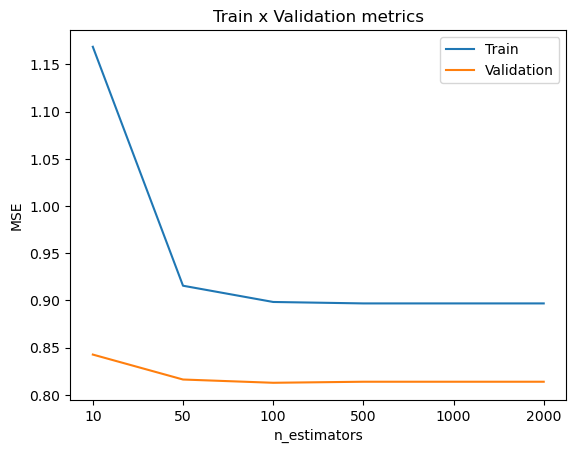

In [261]:
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(MSE_list_train)
plt.plot(MSE_list_val)
plt.legend(['Train','Validation']);

In [262]:
ind_n_estimators = np.argmin(MSE_list_val)
ind_n_estimators

2

In [263]:
best_n_estimators = n_estimators_list[ind_n_estimators]
best_n_estimators

100

In [264]:
xgb_do_model = XGBRegressor(n_estimators = 100, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_do_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-rmse:6.40482
[1]	validation_0-rmse:5.87084
[2]	validation_0-rmse:5.39664
[3]	validation_0-rmse:4.97867
[4]	validation_0-rmse:4.60932
[5]	validation_0-rmse:4.28628
[6]	validation_0-rmse:3.99766
[7]	validation_0-rmse:3.74451
[8]	validation_0-rmse:3.52575
[9]	validation_0-rmse:3.33103
[10]	validation_0-rmse:3.16447
[11]	validation_0-rmse:3.01772
[12]	validation_0-rmse:2.89893
[13]	validation_0-rmse:2.79410
[14]	validation_0-rmse:2.69861
[15]	validation_0-rmse:2.62133
[16]	validation_0-rmse:2.55721
[17]	validation_0-rmse:2.50229
[18]	validation_0-rmse:2.44676
[19]	validation_0-rmse:2.40458
[20]	validation_0-rmse:2.36679
[21]	validation_0-rmse:2.33621
[22]	validation_0-rmse:2.31239
[23]	validation_0-rmse:2.29027
[24]	validation_0-rmse:2.27092
[25]	validation_0-rmse:2.25252
[26]	validation_0-rmse:2.24268
[27]	validation_0-rmse:2.23122
[28]	validation_0-rmse:2.21882
[29]	validation_0-rmse:2.20414
[30]	validation_0-rmse:2.19217
[31]	validation_0-rmse:2.18318
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [265]:
xgb_do_model.best_iteration

99

In [266]:
print(f"MSE for train:\n\tMSE: {MSE(xgb_do_model.predict(X_train),y_train):.4f}")
print(f"MSE for validation:\n\tMSE: {MSE(xgb_do_model.predict(X_val),y_val):.4f}")

MSE for train:
	MSE: 0.9483
MSE for validation:
	MSE: 0.7075


In [267]:
y_pred_do = xgb_do_model.predict(X_val)

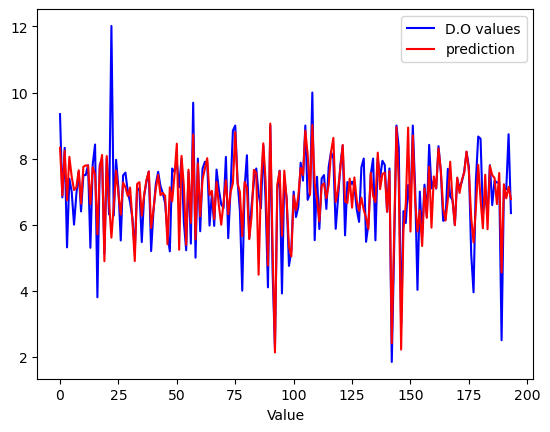

In [268]:
plt.plot(range(len(y_val)),y_val,'b',label='D.O values')
plt.plot(range(len(y_pred_do)),y_pred_do,'r',label='prediction')
plt.legend(loc='best')
plt.xlabel('Sample')
plt.xlabel('Value');

In [269]:
diff_do = y_pred_do - y_val

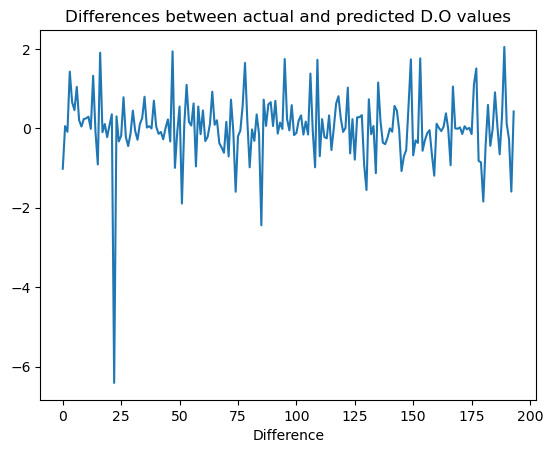

In [270]:
plt.plot(range(len(diff_do)),diff_do)
plt.title('Differences between actual and predicted D.O values')
plt.xlabel('Sample')
plt.xlabel('Difference');

#### DUMPING NEEDED MODELS AND PREPROCCESSORS

In [271]:
# import joblib

##### Dumping for pH

In [272]:
# joblib.dump(xgb_pH_model,'pH_model.sav')

##### Dumping for DO

In [273]:
# joblib.dump(random_forest_do_model,'do_model.sav')